## ETL Report

### Introduction
For our project we used the different tables provided to us from the US Census Bureau's Annual Buisiness Survey API to answer different questions we had about their data.

### Citation
US Census Bureau. (2022, October 28). Annual Business Survey (ABS) APIs. Census.gov. Retrieved December 26, 2022, from https://www.census.gov/data/developers/data-sets/abs.2019.html

### Importing
We imported the following libraries to use 


In [3]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter
pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows', None)


# Company Summary

### Data Sources
This section uses the Data from the Company Summary table. We specifically are looking at the Industry categories and Sex.

### Step 1

Using our US Census api key we call the requests library in python. This allows us to get a file from the us census with all the data from the Company Summary table. We do two seperate calls to get a table with all the data grouped by state and a table with the US data overall. We then turn this data into json format so that it can be imported into the python library pandas.

In [15]:
#create variables for our api key, variables, and urls
apikey = 'af4a7c461bcda111515e0ebeea5e4124fcc267d6'
get = 'GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F'
url = f"https://api.census.gov/data/2018/abscs?get={get}&for=us:*&key={apikey}"
stateurl = url = f"https://api.census.gov/data/2018/abscs?get={get}&for=state:*&key={apikey}"

#request usa data
r = requests.get(url)
print(r)

#request state data
stater = requests.get(stateurl)
print(stater)

#dump the usa data into variables
r = r.json()
r = json.dumps(r)

#dump the state data into variables
stater = stater.json()
stater = json.dumps(stater)

<Response [200]>
<Response [200]>


### Step 2 Transformation
We first start by removing colums that we are not going to use. For any column that had both a category number and label we removed the number and only kept the label column. This allows us to see the names of the categories which is more usefull for understanding then the numbers. Next we renamed the colums so they were easier to understand. We did this same process for both us and state data and named the two tables usadata and statedata which we use later for graphing.

In [16]:
#converted to json
p = pd.read_json(r)

#created dataframe
headers = p.iloc[0]
new_p  = pd.DataFrame(p.values[1:], columns=headers)
#remove columns we don't need
new_p = new_p.drop(columns =['SEX', 'ETH_GROUP', 'RACE_GROUP', 'VET_GROUP', 'EMPSZFI', 'FIRMPDEMP_S_F', 'PAYANN_S_F', 'YEAR','RCPPDEMP_S_F', 'FIRMPDEMP_F', 'RCPPDEMP_F', 'EMP_F', 'EMP_S_F'])

#renamed columns
usadata = new_p.rename({"NAICS2017_LABEL": "Industry", 
                    "SEX_LABEL": "Sex",
                    "FIRMPDEMP": "EmpFirms",
                    "ETH_GROUP_LABEL": "Eth", 
                    "RACE_GROUP_LABEL": "Race", 
                    "VET_GROUP_LABEL": "Vet", 
                    "EMPSZFI_LABEL": "EMPSZFI"}, 
                    axis='columns')

#usadata.info()

In [18]:
#converted to json
statedatap = pd.read_json(stater)

#created dataframe
headers = statedatap.iloc[0]
statedata  = pd.DataFrame(statedatap.values[1:], columns=headers)

#remove columns we don't need
statedata = statedata.drop(columns =['ETH_GROUP', 'RACE_GROUP', 'VET_GROUP', 'EMPSZFI', 'FIRMPDEMP_S_F', 'PAYANN_S_F', 'YEAR','RCPPDEMP_S_F','EMP_S_F', 'FIRMPDEMP_F'])

#renamed columns
statedata = statedata.rename({"NAICS2017_LABEL": "Industry",
                    "SEX_LABEL": "Sex",  
                    "ETH_GROUP_LABEL": "Eth", 
                    "FIRMPDEMP": "EmpFirms", 
                    "RACE_GROUP_LABEL": "Race", 
                    "VET_GROUP_LABEL": "Vet", 
                    "NAME": "Name",
                    "EMPSZFI_LABEL": "EMPSZFI"}, 
                    axis='columns')
#statedata.info()

### Step 3 Visulization table 1

For The first visulization we create two tables for ammount of employer firms by state by the top two Industries. This is done by first converting the Employer Firms column into an int and then  grouping by the sum of top industry and sorting their values.

In [19]:
#new table for the count by state for Professional, scientific, and technical services
statecount = statedata[['Name','EmpFirms', 'Industry']]
statecount['EmpFirms'] = statecount['EmpFirms'].astype('int')
statecount = statecount[(statecount['Industry']=='Professional, scientific, and technical services')]

#grouped by sum 
statecount = statecount.groupby(['Name'], as_index=False)['EmpFirms'].sum()

#sorted and renamed a column
statecount.sort_values(by='EmpFirms', ascending=False, inplace=True)
statecount.rename(columns={'EmpFirms': 'Science'}, inplace=True)

#statecount.head(100)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_3732\2783729356.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statecount['EmpFirms'] = statecount['EmpFirms'].astype('int')


In [20]:
#new table for the count by state for Manufacturing

statecountu = statedata[['Name','EmpFirms', 'Industry']]
statecountu['EmpFirms'] = statecountu['EmpFirms'].astype('int')
statecountu = statecountu[(statecountu['Industry']=='Manufacturing')]

#grouped by sum 
statecountu = statecountu.groupby(['Name'], as_index=False)['EmpFirms'].sum()

#sorted and renamed a column
statecountu.sort_values(by='EmpFirms', ascending=False, inplace=True)
statecountu.rename(columns={'EmpFirms': 'Manufacturing'}, inplace=True)


C:\Users\Daniel\AppData\Local\Temp\ipykernel_3732\3929545102.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statecountu['EmpFirms'] = statecountu['EmpFirms'].astype('int')


### Step 4 Seaborn
We join the two tables above into one and graph it using seaborn

C:\Users\Daniel\AppData\Local\Temp\ipykernel_3732\853999790.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values]);


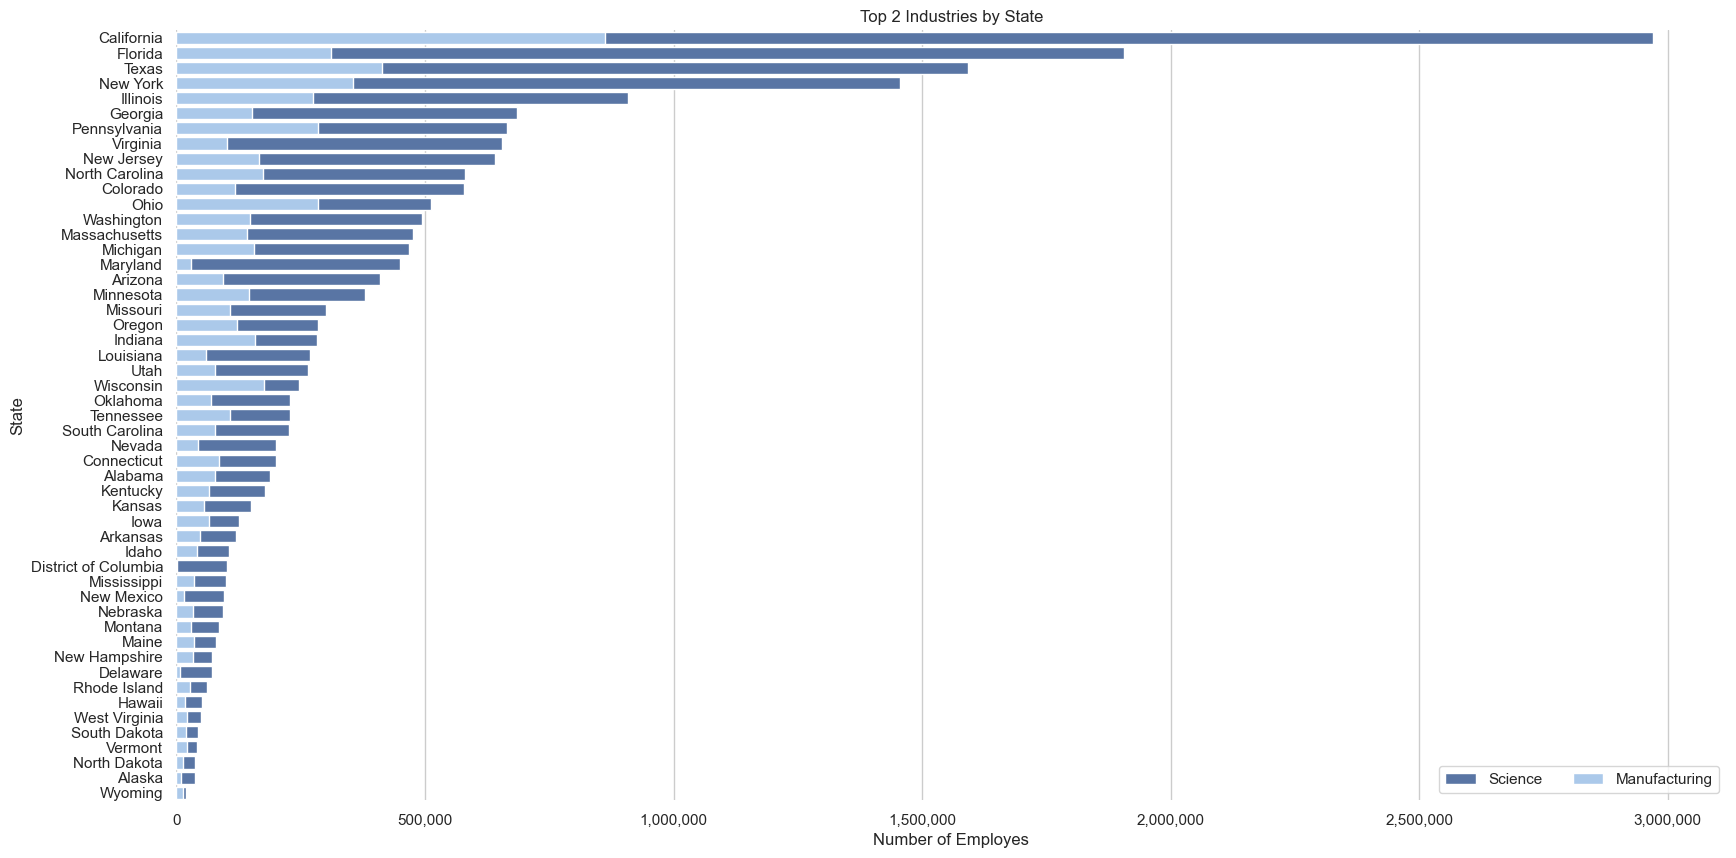

In [28]:
#Joined the two tables, sorted, and graphed
statecategoriesjoin = pd.merge(statecountu, statecount, on='Name')
statecategoriesjoin.sort_values(by='Science', ascending=False, inplace=True)

#Graphed with seaborn
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(20,10))
sns.set_color_codes("deep")
sns.barplot(x="Science", y="Name", data=statecategoriesjoin,
            label="Science", color="b")    
sns.set_color_codes("pastel")
sns.barplot(x="Manufacturing", y="Name", data=statecategoriesjoin,
            label="Manufacturing", color="b")
      
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="State")
ax.set(xlabel="Number of Employes")
ax.set(title="Top 2 Industries by State")
sns.despine(left=True, bottom=True)
plt.ticklabel_format(style='plain', axis= 'x')
current_values = plt.gca().get_xticks();
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values]);

In [25]:
mg = statecategoriesjoin[(statecategoriesjoin['Manufacturing']>statecategoriesjoin['Manufacturing'])]

statecategoriesjoin.head(60)

,Name,Manufacturing,Science
0,California,862550,2969350
3,Florida,310586,1906104
1,Texas,413788,1592296
2,New York,356269,1454819
6,Illinois,275450,908842
12,Georgia,151867,686159
4,Pennsylvania,284655,665825
20,Virginia,101448,654986
9,New Jersey,167079,641779
8,North Carolina,174790,580373


This visulization helps us see states that are different from the normal with the top two Industries. From the graph we can see that most states have Professional, scientific, and technical services as its number one industry but states like Wyoming or Ohio have Manufacturing as its highest industry. We can also see how much bigger States like California are compared to other states

### Visulization 2
Next visulization is the overall ammount of employer firms accross the United State by Industry. It is graphed using matplotlib

<BarContainer object of 20 artists>

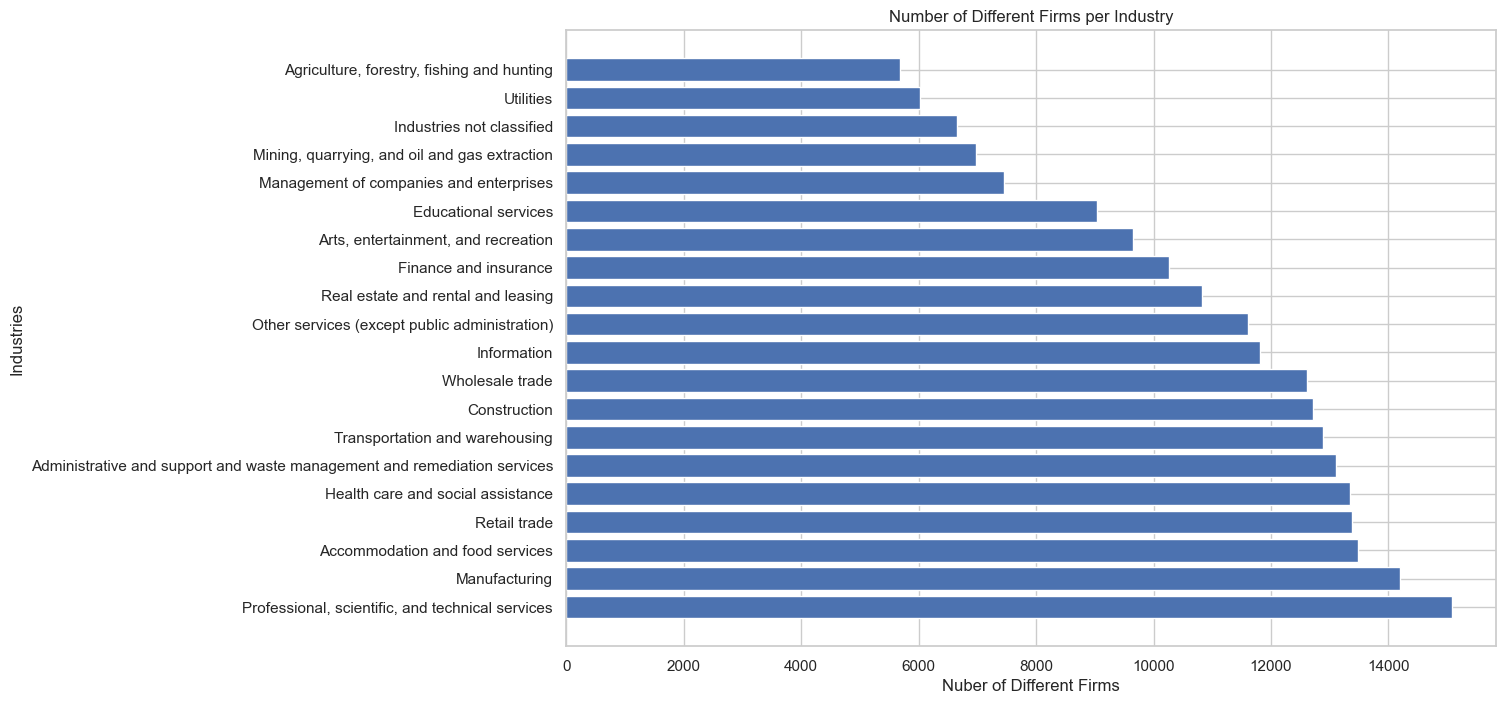

In [ ]:
#Create new table for industry across the us
itotal = usadata[['Industry']]
itotal = itotal.groupby('Industry').size().reset_index(name='count')

#Sorted table
itotal.sort_values(by='count', ascending=False, inplace=True)

#Removed the totals which would scew the data
itotal = itotal[(itotal['Industry']!='Total for all sectors')]

#Graphed using matplotlib
plt.figure(figsize = (12, 8))
plt.title("Number of Different Firms per Industry")
plt.xlabel("Nuber of Different Firms")
plt.ylabel("Industries")
#barplot
plt.barh(y = itotal['Industry'], width = itotal['count'])

This visulization shows us the total number of employer firms per industry across the Unites States as a whole. This allows us to see what type of jobs people are working in as a total and not by state.

### Visulization 3
We created a table that seperated the Industries across the United States by Sex and then graphed it using matplotlib 

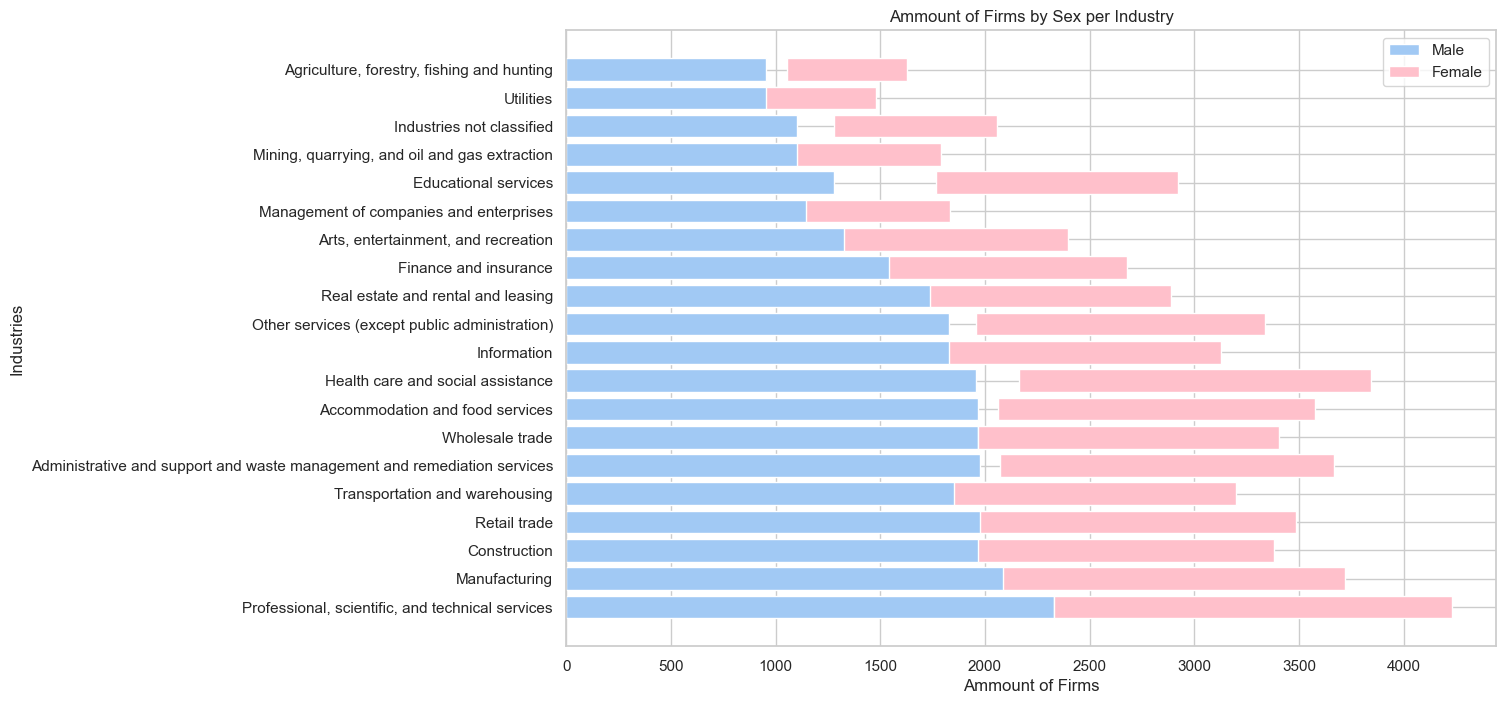

In [ ]:
#New table for Industries and sex
itotal = usadata[['Industry','Sex']]
itotal = itotal.groupby(['Industry', 'Sex']).size().reset_index(name='count')

#removed totals and sorted
itotal = itotal[(itotal['Industry']!='Total for all sectors')]
itotal = itotal[(itotal['Sex']!='Total')]
itotal.sort_values(by='count', ascending=False, inplace=True)

#created 3 tables for Male, Female, and Equally Male/female
imale = itotal[(itotal['Sex']=='Male')]
ifemale = itotal[(itotal['Sex']=='Female')]
iboth = itotal[(itotal['Sex']=="Equally male/female")]


#graphed both male and female together using matplotlib
plt.figure(figsize = (12, 8))
plt.barh(imale['Industry'],imale['count'], height=0.8, color='b')
plt.barh(ifemale['Industry'],ifemale['count'], color='pink',height=0.8, left=imale['count'])
plt.legend(["Male", "Female"])
plt.xlabel("Ammount of Firms")
plt.ylabel("Industries")
plt.title("Ammount of Firms by Sex per Industry")
plt.show()



This visulization shows that in all industries there are more males working then females.

### Visulization 4
Lastly we graphed companies split by both equally between male and femal to compare to our previous graph 

Text(0, 0.5, 'Industries')

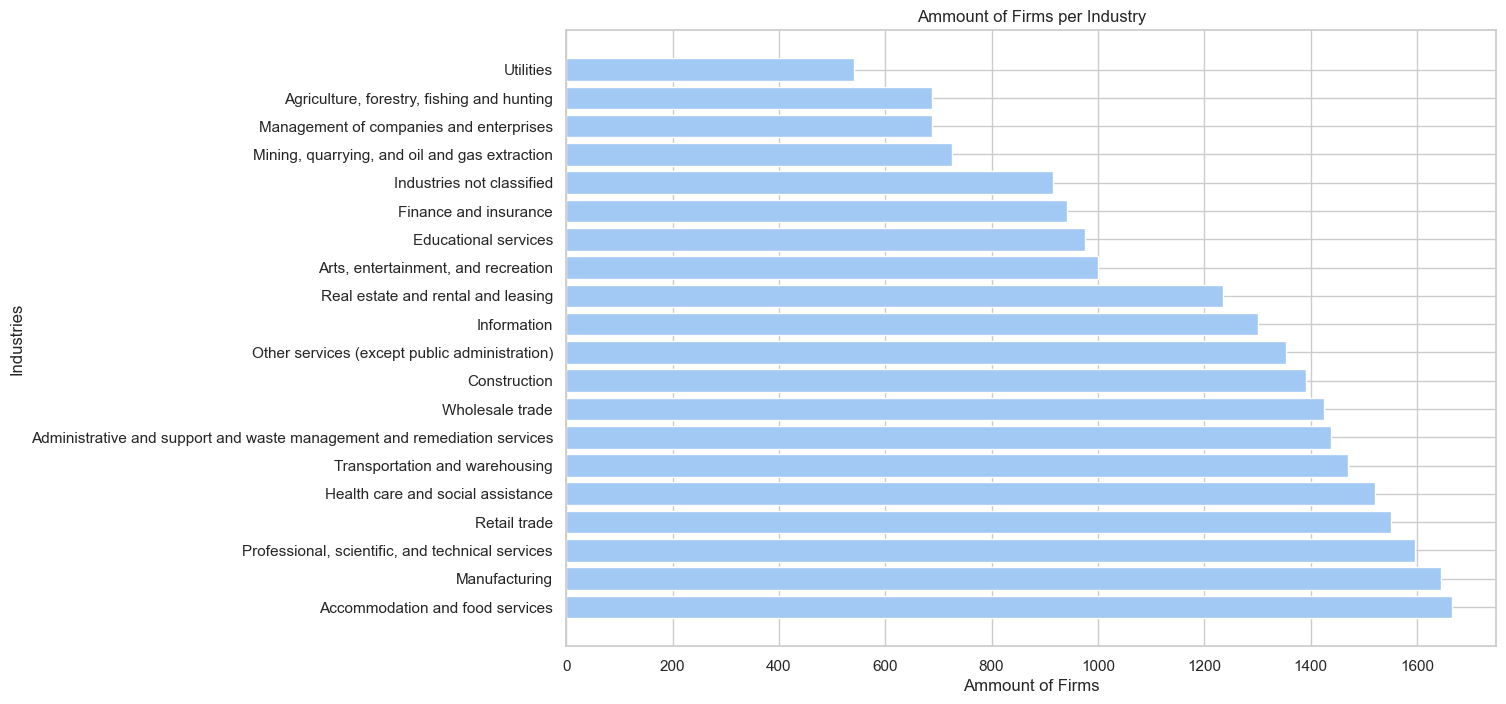

In [ ]:
#using matplotlib we graph the table with equally male and female employees
plt.figure(figsize = (12, 8))
plt.barh(iboth['Industry'],iboth['count'], color='b')
plt.title("Ammount of Firms per Industry")
plt.xlabel("Ammount of Firms")
plt.ylabel("Industries")

This visulization helps us show that the difference in males and females from our previous graph is less becuase of the ammount of firms that are about equal in the ammount of males to females working there.

# Characteristics of Businesses

### Step #1
Requested an individual API key from the website in order to request the data and URLs. Next, I requested individual columns I believed would be useful in my investigation on both a state level and a national US level. I stored the requested data in two json files with their respective information.

In [ ]:
apikey = 'cabb73d5e421501e2701babc11c42a974c0e6e99'

# Get data for both state and US

business_nation = requests.get(f'http://api.census.gov/data/2018/abscb?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,BUSCHAR,BUSCHAR_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,FIRMPDEMP,RCPPDEMP,EMP,PAYANN&for=us:*&key={apikey}')
print(business_nation)
business_state = requests.get(f'http://api.census.gov/data/2018/abscb?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,BUSCHAR,BUSCHAR_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,FIRMPDEMP,RCPPDEMP,EMP,PAYANN&for=state:*&key={apikey}')
print(business_state)

business_nation = business_nation.json()
business_nation = json.dumps(business_nation)

business_state = business_state.json()
business_state = json.dumps(business_state)

<Response [200]>
<Response [200]>


### Step #2
Read in both the state and US json files to further clean and organize. Began the cleaning process by dropping unwanted columns that my group deemed unnecessary for the research. We decided to focus on the industries on each level and the characteristics that describe them.

In [ ]:
# Find data on the US level
nation = pd.read_json(business_nation)

headers = nation.iloc[0]
bus = pd.DataFrame(nation.values[1:], columns=headers)

# Remove unwanted columns
bus = bus.drop(columns =['GEO_ID', 'NAICS2017', 'SEX', 'ETH_GROUP', 'RACE_GROUP', 'RACE_GROUP_LABEL', 'BUSCHAR', 'us'])
bus

,NAME,NAICS2017_LABEL,BUSCHAR_LABEL,SEX_LABEL,ETH_GROUP_LABEL,FIRMPDEMP,RCPPDEMP,EMP,PAYANN
0,United States,Total for all sectors,All firms,Total,Total,5722142,38405539368,128196406,6937240308
1,United States,Total for all sectors,1 person,Total,Total,1628501,2270021185,10991334,454218390
2,United States,Total for all sectors,2 to 4 people,Total,Total,1024784,2462681905,11240900,478308387
3,United States,Total for all sectors,5 to 10 people,Total,Total,49436,413777541,1423837,75150602
4,United States,Total for all sectors,11 or more people,Total,Total,31846,6023549720,13448854,986906070
...,...,...,...,...,...,...,...,...,...
4298,United States,Industries not classified,2 to 4 people,Equally male/female,Hispanic,0,0,0,0
4299,United States,Industries not classified,Total reporting,Equally male/female,Hispanic,0,0,0,0
4300,United States,Industries not classified,All firms,Total,Equally Hispanic/non-Hispanic,0,0,0,0
4301,United States,Industries not classified,2 to 4 people,Total,Equally Hispanic/non-Hispanic,0,0,0,0


In [ ]:
#find data on the state level
state = pd.read_json(business_state)

headers = state.iloc[0]
bstate = pd.DataFrame(state.values[1:], columns=headers)

#remove unwanted columns
bstate = bstate.drop(columns =['GEO_ID', 'NAICS2017', 'SEX', 'ETH_GROUP', 'RACE_GROUP', 'RACE_GROUP_LABEL', 'BUSCHAR', 'state'])
bstate

,NAME,NAICS2017_LABEL,BUSCHAR_LABEL,SEX_LABEL,ETH_GROUP_LABEL,FIRMPDEMP,RCPPDEMP,EMP,PAYANN
0,Mississippi,Total for all sectors,All firms,Total,Total,40856,0,920447,34137231
1,Mississippi,Total for all sectors,1 person,Total,Total,10704,0,80964,2835519
2,Mississippi,Total for all sectors,2 to 4 people,Total,Total,5956,0,59086,2031186
3,Mississippi,Total for all sectors,5 to 10 people,Total,Total,360,0,13497,618245
4,Mississippi,Total for all sectors,11 or more people,Total,Total,604,0,106361,4807141
...,...,...,...,...,...,...,...,...,...
403,Minnesota,Total for all sectors,5 to 10 people,Total,Total,1286,0,25264,1679605
404,Minnesota,Total for all sectors,11 or more people,Total,Total,1475,0,327504,23461108
405,Minnesota,Total for all sectors,Unknown number of owners,Total,Total,1095,0,390188,28138080
406,Minnesota,Total for all sectors,Total reporting,Total,Total,61423,0,1183664,71702040


### Step #3
Renamed columns from both tables in order to read the data better for interpretation.

In [ ]:
# rename column names to make it easier to read
bus.rename(columns={'NAME': 'Country',
                    'NAICS2017_LABEL':'Industry',
                    'BUSCHAR_LABEL': 'BusinessCharacteristic',
                    'SEX_LABEL':'Sex',
                    'ETH_GROUP_LABEL':'Ethnicity',
                    'FIRMPDEMP':'EmployerFirms',
                    'RCPPDEMP':'SalesRevenue',
                    'EMP':'Employees',
                    'PAYANN':'Payroll'}, inplace=True)

bus.head()

,Country,Industry,BusinessCharacteristic,Sex,Ethnicity,EmployerFirms,SalesRevenue,Employees,Payroll
0,United States,Total for all sectors,All firms,Total,Total,5722142,38405539368,128196406,6937240308
1,United States,Total for all sectors,1 person,Total,Total,1628501,2270021185,10991334,454218390
2,United States,Total for all sectors,2 to 4 people,Total,Total,1024784,2462681905,11240900,478308387
3,United States,Total for all sectors,5 to 10 people,Total,Total,49436,413777541,1423837,75150602
4,United States,Total for all sectors,11 or more people,Total,Total,31846,6023549720,13448854,986906070


In [ ]:
# rename column names to make it easier to read
bstate.rename(columns={'NAME':'State',
                    'NAICS2017_LABEL':'Industry',
                    'BUSCHAR_LABEL': 'BusinessCharacteristic',
                    'SEX_LABEL':'Sex',
                    'ETH_GROUP_LABEL':'Ethnicity',
                    'FIRMPDEMP':'EmployerFirms',
                    'RCPPDEMP':'SalesRevenue',
                    'EMP':'Employees',
                    'PAYANN':'Payroll'}, inplace=True)

bstate.head()

,State,Industry,BusinessCharacteristic,Sex,Ethnicity,EmployerFirms,SalesRevenue,Employees,Payroll
0,Mississippi,Total for all sectors,All firms,Total,Total,40856,0,920447,34137231
1,Mississippi,Total for all sectors,1 person,Total,Total,10704,0,80964,2835519
2,Mississippi,Total for all sectors,2 to 4 people,Total,Total,5956,0,59086,2031186
3,Mississippi,Total for all sectors,5 to 10 people,Total,Total,360,0,13497,618245
4,Mississippi,Total for all sectors,11 or more people,Total,Total,604,0,106361,4807141


### Step #4
Changed the data types of several columns from objects to floats for readability and in order to aggregate the columns later for visualizations.

In [ ]:
# Change some objects into numeric data that can be calculated
columns_float = ['EmployerFirms', 'SalesRevenue', 'Employees', 'Payroll']

for column in columns_float:
    bus[column]=bus[column].astype('float')

bus.head(50)

,Country,Industry,BusinessCharacteristic,Sex,Ethnicity,EmployerFirms,SalesRevenue,Employees,Payroll
0,United States,Total for all sectors,All firms,Total,Total,5722142.0,3.840554e+10,128196406.0,6.937240e+09
1,United States,Total for all sectors,1 person,Total,Total,1628501.0,2.270021e+09,10991334.0,4.542184e+08
2,United States,Total for all sectors,2 to 4 people,Total,Total,1024784.0,2.462682e+09,11240900.0,4.783084e+08
3,United States,Total for all sectors,5 to 10 people,Total,Total,49436.0,4.137775e+08,1423837.0,7.515060e+07
4,United States,Total for all sectors,11 or more people,Total,Total,31846.0,6.023550e+09,13448854.0,9.869061e+08
5,United States,Total for all sectors,Unknown number of owners,Total,Total,21585.0,7.482372e+09,17527385.0,1.199174e+09
6,United States,Total for all sectors,Total reporting,Total,Total,2756150.0,1.865240e+10,54632311.0,3.193758e+09
7,United States,Total for all sectors,Item not reported,Total,Total,127395.0,2.951022e+09,7714221.0,4.614945e+08
8,United States,Total for all sectors,All firms,Female,Total,1141410.0,1.776835e+09,10149257.0,3.880852e+08
9,United States,Total for all sectors,1 person,Female,Total,416190.0,2.823855e+08,2150147.0,7.201726e+07


In [ ]:
# Change some objects into numeric data that can be calculated on a state level

columns_float = ['EmployerFirms', 'SalesRevenue', 'Employees', 'Payroll']

for column in columns_float:
    bstate[column]=bstate[column].astype('float')

bstate

,State,Industry,BusinessCharacteristic,Sex,Ethnicity,EmployerFirms,SalesRevenue,Employees,Payroll
0,Mississippi,Total for all sectors,All firms,Total,Total,40856.0,0.0,920447.0,34137231.0
1,Mississippi,Total for all sectors,1 person,Total,Total,10704.0,0.0,80964.0,2835519.0
2,Mississippi,Total for all sectors,2 to 4 people,Total,Total,5956.0,0.0,59086.0,2031186.0
3,Mississippi,Total for all sectors,5 to 10 people,Total,Total,360.0,0.0,13497.0,618245.0
4,Mississippi,Total for all sectors,11 or more people,Total,Total,604.0,0.0,106361.0,4807141.0
...,...,...,...,...,...,...,...,...,...
403,Minnesota,Total for all sectors,5 to 10 people,Total,Total,1286.0,0.0,25264.0,1679605.0
404,Minnesota,Total for all sectors,11 or more people,Total,Total,1475.0,0.0,327504.0,23461108.0
405,Minnesota,Total for all sectors,Unknown number of owners,Total,Total,1095.0,0.0,390188.0,28138080.0
406,Minnesota,Total for all sectors,Total reporting,Total,Total,61423.0,0.0,1183664.0,71702040.0


### Step #5
Created tables to individually work from when creating visualizaitons. Tables that were created were ones for industries, business characteristics, and employee payrolls based on sex.

In [ ]:
# table to calculate number of employees and firms in the US per industry
industry = bus[['Industry', 'Employees', 'EmployerFirms']]

# leave out total for industries
industry = industry[(industry['Industry'] !='Total for all sectors')]

# group by industry type and the number of emplyees/firms
industry = industry.groupby(['Industry'], as_index = False)['Employees', 'EmployerFirms'].sum()

#Sort by the number of employees for each industry
industry.sort_values(by ='Employees', ascending = False, inplace = True)

industry.head(20)

C:\Users\cheyp\AppData\Local\Temp\ipykernel_11080\3176164141.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  industry = industry.groupby(['Industry'], as_index = False)['Employees', 'EmployerFirms'].sum()


,Industry,Employees,EmployerFirms
0,Accommodation and food services,134697571.0,6733782.0
7,Health care and social assistance,112694050.0,8503018.0
16,Retail trade,98969057.0,8486970.0
1,Administrative and support and waste managemen...,84757668.0,4744003.0
4,Construction,81062707.0,10127748.0
14,"Professional, scientific, and technical services",78225356.0,12127831.0
11,Manufacturing,76654930.0,3249778.0
19,Wholesale trade,50661504.0,4079581.0
13,Other services (except public administration),31939012.0,5410230.0
6,Finance and insurance,31097753.0,3285003.0


In [ ]:
# table to calculate total number of employers in all industries per business characteristic
buschar = bus[['BusinessCharacteristic', 'Industry', 'EmployerFirms']]

# Only need the total for industries
buschar = buschar[(buschar['Industry'] =='Total for all sectors')]

# Filter out the unnecessary values
buschar = buschar[(buschar['BusinessCharacteristic'] != 'All firms') & (buschar['BusinessCharacteristic'] != 'Total reporting') & (buschar['BusinessCharacteristic'] != 'Item not reported')]

# group by both the business and industry type and get the sum of firms for each characteristic
buschar = buschar.groupby(['BusinessCharacteristic', 'Industry'], as_index = False)['EmployerFirms'].sum()

# sort by the number of employers to see which business types have the most employers
buschar.sort_values(by='EmployerFirms', ascending = False, inplace = True)

# renamed the columns to show further detail
buschar.rename(columns={'EmployerFirms': 'Total Employers',
                        'BusinessCharacteristic' : 'Number of Owners'}, inplace=True)

buschar.head(20)

,Number of Owners,Industry,Total Employers
0,1 person,Total for all sectors,11396114.0
2,2 to 4 people,Total for all sectors,7144930.0
3,5 to 10 people,Total for all sectors,336087.0
1,11 or more people,Total for all sectors,92980.0
4,Unknown number of owners,Total for all sectors,88677.0


In [ ]:
# table to see the number of employees and their total payrolls based on sex
payroll = bus[['Industry','Sex','Employees','Payroll']]

# Excluded the total industry value as it greatly skews the data for visualizations.
payroll = payroll[(payroll['Industry'] !='Total for all sectors')]

# Filtered out the data so that it would only show employees that are either male or female.
payroll = payroll[(payroll['Sex'] =='Female')|(payroll['Sex'] =='Male')]

# Grouped the data based on industry and sex
payroll = payroll.groupby(['Industry','Sex'], as_index = False).sum()

payroll.head(70)

,Industry,Sex,Employees,Payroll
0,Accommodation and food services,Female,7984887.0,1.455353e+08
1,Accommodation and food services,Male,36704039.0,6.998373e+08
2,Administrative and support and waste managemen...,Female,5983489.0,2.043906e+08
3,Administrative and support and waste managemen...,Male,22553209.0,8.166381e+08
4,"Agriculture, forestry, fishing and hunting",Female,96766.0,2.192090e+06
5,"Agriculture, forestry, fishing and hunting",Male,2690129.0,3.561906e+07
6,"Arts, entertainment, and recreation",Female,734371.0,2.971785e+07
7,"Arts, entertainment, and recreation",Male,3788818.0,1.423660e+08
8,Construction,Female,3553394.0,2.069642e+08
9,Construction,Male,26256504.0,1.512943e+09


## Visualizations

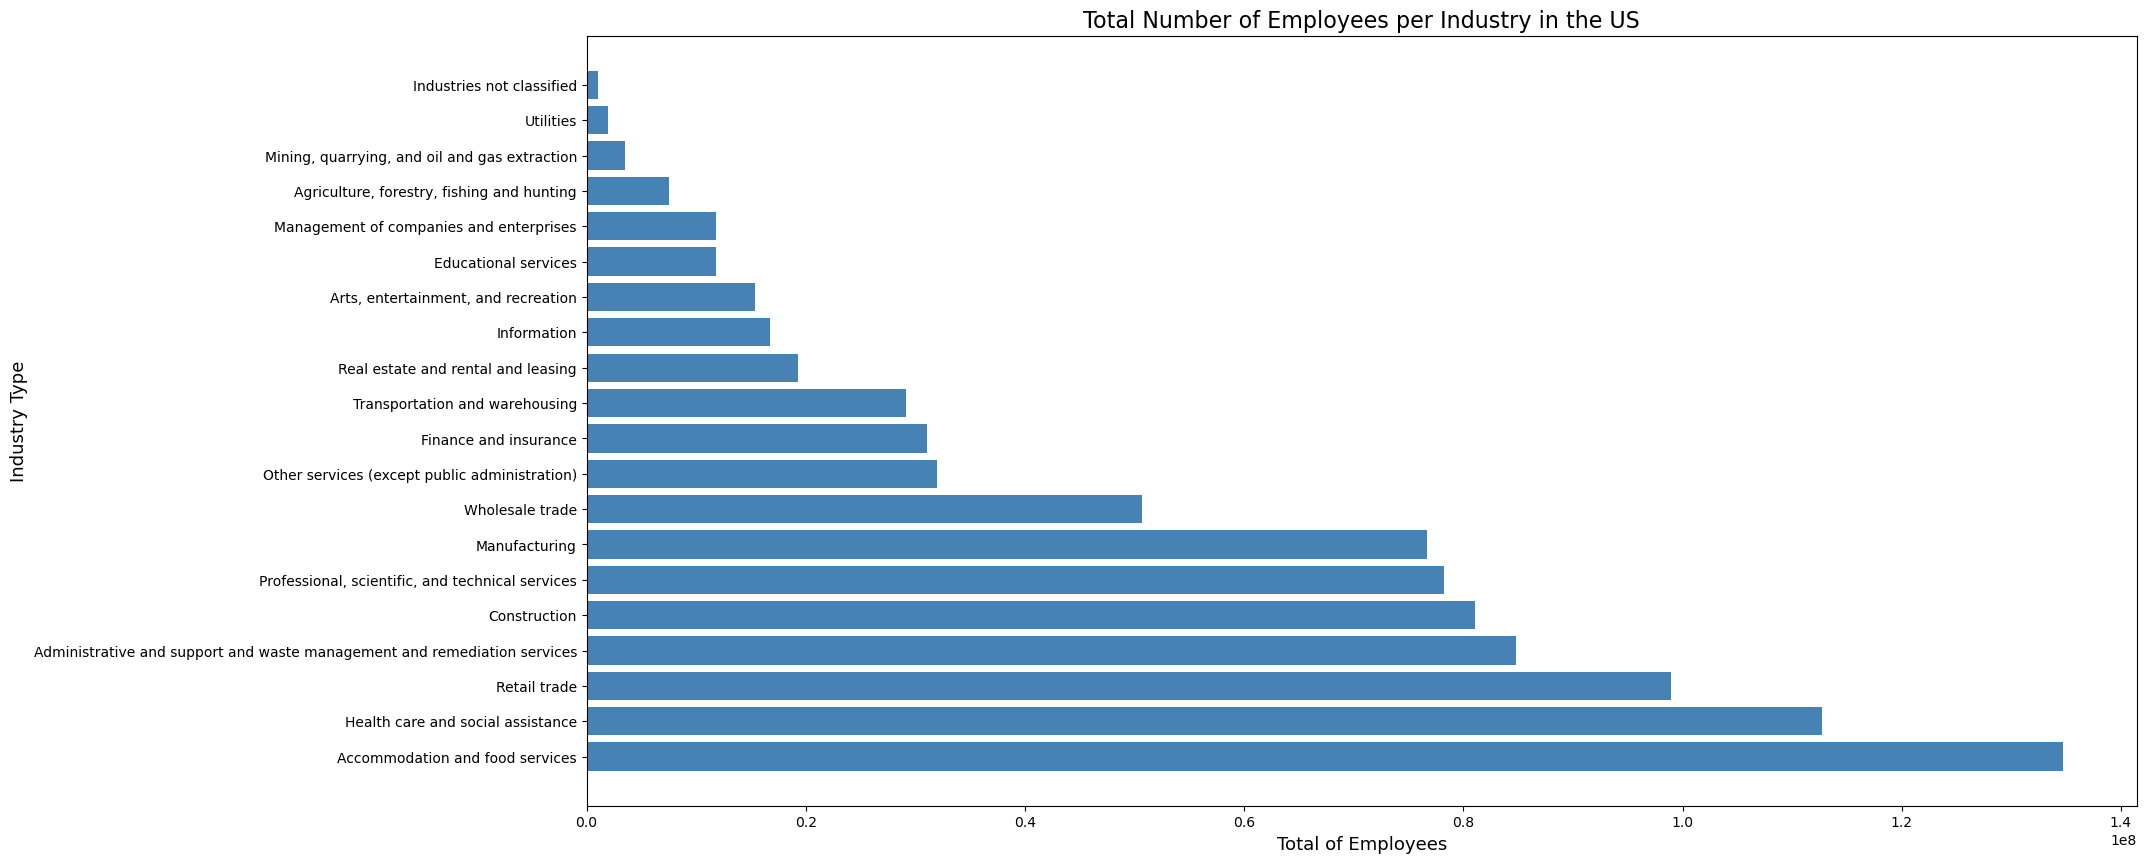

In [ ]:
plt.figure(figsize = (20, 10))

plt.barh(y = industry['Industry'], width = industry['Employees'], color = 'steelblue');

plt.title('Total Number of Employees per Industry in the US', size = 16)
plt.ylabel('Industry Type', size = 13)
plt.xlabel('Total of Employees', size = 13);

For my visualizations, I decided to focus on businesses and industries on the national US level rather than by state. The first visualization for the business characteristics is one that shows the amount of employees for each industry sector. As you can see, there are abundantly more employees in the accommodation and food services industry with health care/social social assistance and retail trade not far behind. This makes sense as these industries generally need more employees because they assist or help other people/customers.

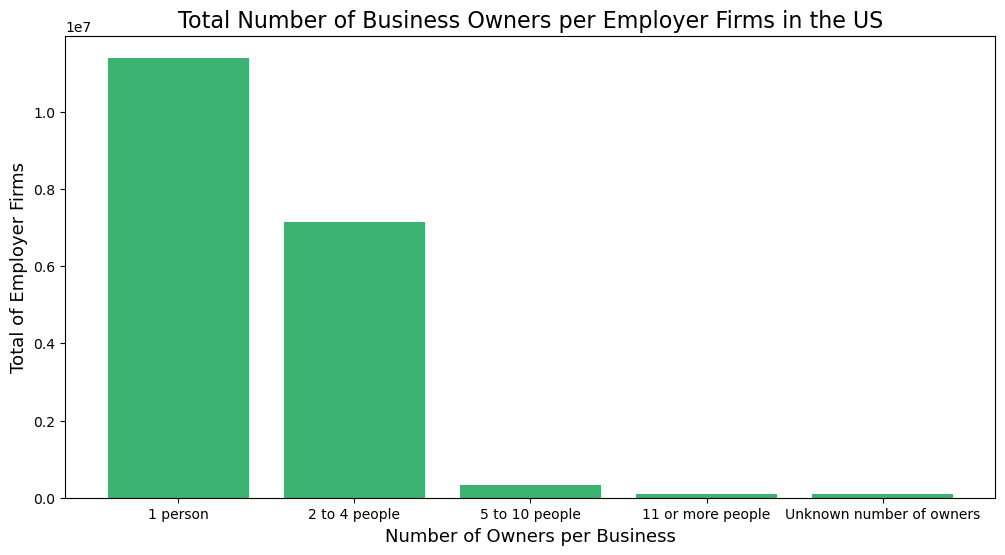

In [ ]:
plt.figure(figsize = (12, 6))

plt.bar(x = buschar['Number of Owners'], height = buschar['Total Employers'], color = 'mediumseagreen');

plt.title('Total Number of Business Owners per Employer Firms in the US', size = 16)
plt.xlabel('Number of Owners per Business', size = 13)
plt.ylabel('Total of Employer Firms', size = 13);

The next visualization demonstrates the popularity for a certain number of business owners per business. According to the graph, businesses in the US typically tend to have one business owner with two to four business owners being the next popular amount. If we go by the graph, it is very unlikely that businesses will have more than four owners per one business.

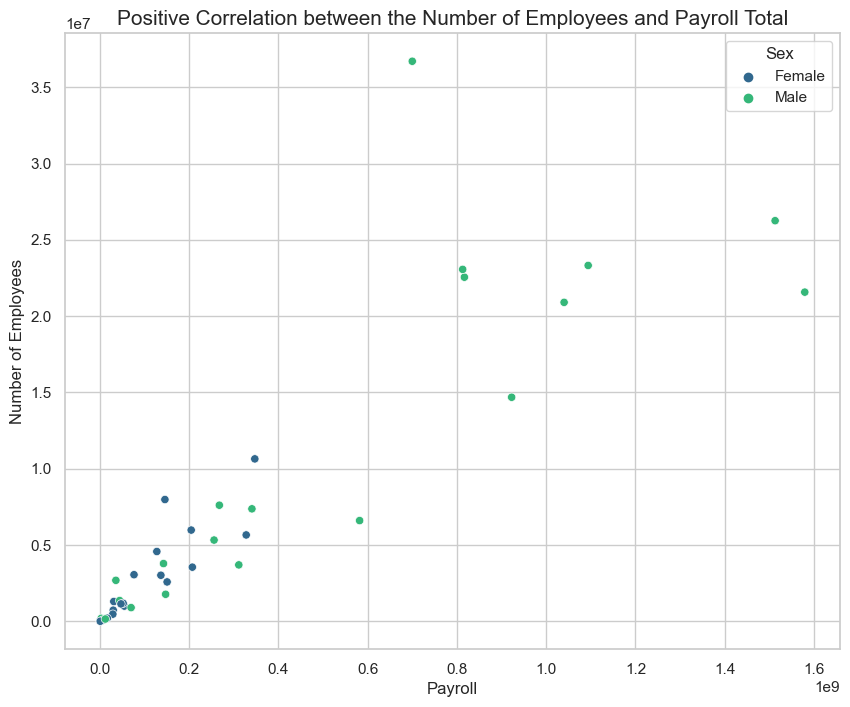

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))

sns.set_theme(style = "whitegrid")
sns.scatterplot(data = payroll, x = 'Payroll', y = 'Employees', hue = 'Sex', palette = 'viridis');
ax.set_title('Positive Correlation between the Number of Employees and Payroll Total', size = 15)
ax.set_xlabel('Payroll', size = 12) 
ax.set_ylabel('Number of Employees', size = 12);


For this scatterplot graph, I decided to focus on the payroll for the amount of amployees based on sex per industry. As you can see, there is a strong positive correlation between the amount of employees and the payroll total. This makes sense as the total of the employees payroll increases when the amount of employees increases. However, what is surprising is the drastic difference between the total payroll for males and females. To find out why there would be such a difference, I calculated the amount of males and females in each industry to better understand why males would have a pattern of such higher payrolls. What I found in the next stacked bar graph was that there tended to be a lot more males in almost all of the inndustries. With the highest amount of females being in the healthcare and social assistance industry. The only industry where the amount of males and females seemed to be equal was the education industry. With this knowledge, it can be easy to deduce that the vast difference between payrolls could be due to the amount of employees for the sexes. However, there could be another underlying reason that was not reported in the APIs, like females being paid less than males for instance. But that would be an inference based on guessed reasoning.

C:\Users\cheyp\AppData\Local\Temp\ipykernel_11080\1333570187.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  MFTable['Total'] = MFTable.sum(axis = 1)


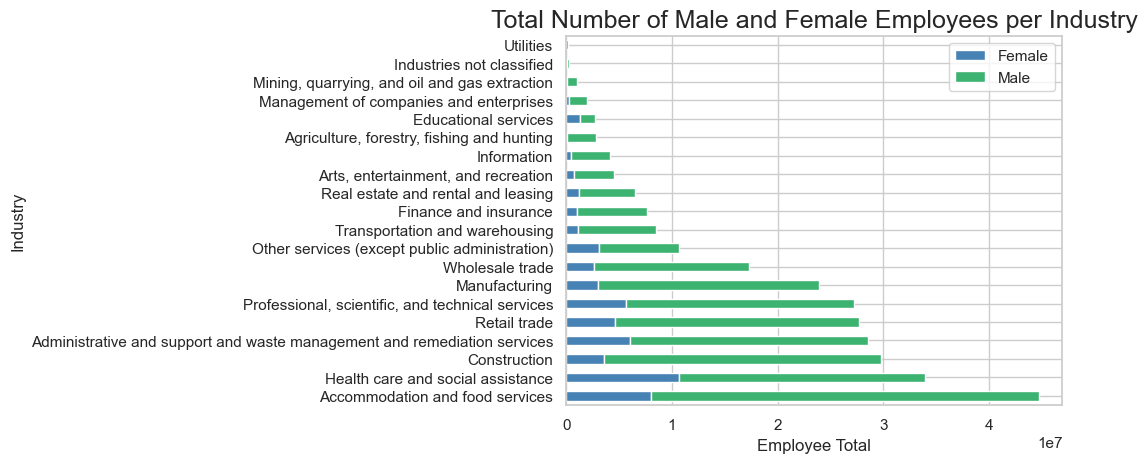

In [ ]:

MFTable = pd.pivot_table(payroll, index=['Industry'], columns=['Sex'], values=['Employees'], aggfunc = sum)
MFTable.columns = ['_'.join(str(s).strip() for s in col if s) for col in MFTable.columns]
MFTable = MFTable.rename(columns={'Employees_Female': 'Female',
                                  'Employees_Male' : 'Male'});

MFTable.reset_index(inplace = True)

MFTable['Total'] = MFTable.sum(axis = 1)
MFTable = MFTable.sort_values(by = 'Total', ascending = False);

industry_stacked_bar_vals = MFTable.drop('Total', axis = 1);

sns.set_theme(style = "whitegrid")
industry_stacked_bar_vals.set_index('Industry').plot(kind = 'barh', stacked = True, color = ['steelblue', 'mediumseagreen'])
plt.title('Total Number of Male and Female Employees per Industry', fontsize = 18)
plt.ylabel('Industry', fontsize = 12)
plt.xlabel('Employee Total', fontsize = 12);


# Technology Factors Dataset ETL

## US Aggregate Dataset

##### Extracting the Data
To begin with this dataset, we built up our initial url to call the API and retrieve the needed data. For this url we needed a variety of things including the base api url, the get clause, the for clause, and the apikey. For our initial dataset, I included all of the technology exclusive variables within the get statement and additionally set the for to only US data. Using these discussed variable, we were able to construct the final url with a f-string.

In [ ]:
# each part of the api url gets its own variable
apikey = '&key=240ad37f761e431bc5288cca3370427cb54d59b3'
get = 'get=GEO_ID,NAME,EMP,EMP_F,ETH_GROUP_LABEL,FACTORS_P,FACTORS_P_LABEL,FACTORS_U,FACTORS_U_LABEL,FIRMPDEMP,FIRMPDEMP_F,IMPACTWF_P,IMPACTWF_P_LABEL,IMPACTWF_U,IMPACTWF_U_LABEL,IMPACTWK_P,IMPACTWK_P_LABEL,IMPACTWK_U,IMPACTWK_U_LABEL,MOTPRODTECH,MOTPRODTECH_LABEL,MOTUSETECH,MOTUSETECH_LABEL,NAICS2017_LABEL,NSFSZFI,NSFSZFI_LABEL,PAYANN,RACE_GROUP_LABEL,RCPPDEMP,RCPPDEMP_F,SEX_LABEL,TECHSELL,TECHSELL_LABEL,TECHUSE,TECHUSE_LABEL,VET_GROUP_LABEL'
for_filter = '&for=us:*'
base_url = 'https://api.census.gov/data/2018/abstcb?'

# use an f string to put them all together and form the final url
url = f"{base_url}{get}{for_filter}{apikey}"

Next, using the requests and json library that were imported above, we ran a get request and confirmed that it came back with Response 200.

In [ ]:
# perform get request and confirm it worked (looking for <Response [200]>)
r = requests.get(url=url)
print(r)

<Response [200]>


Once we confirmed the get request worked as expected, the next step was to get the data into a pandas dataframe. To do this, we used json.loads to load the data from the web into a json file. Then, we created a dataframe using the pd.DataFrame.from_dict() method on the json file. This got our data into a dataframe; however, the column names were appearing in the first row instead of as column headers. To fix this we set the columns equal to the first row, then gathered all the rows besides the first into a different variable. Then specifying the column names and the data, we can create a dataframe of our data with the correct column headers and data.

In [ ]:
# load get request into json format
r = json.loads(r.text)

# load data into df from json format
data = pd.DataFrame.from_dict(r)

# fix column headers
columns = data.iloc[0]
new_data = data.values[1:]
tech_data = pd.DataFrame(new_data, columns=columns)

##### Transforming the Data

In the next step, we performed our transformations on the data. To begin this section, we decided to keep only specified columns. We dropped the flag columns as they were almost entirely null and not very helpful. Additionally, we opted to keep the label columns instead of the numbered columns (i.e. we keep factors_p_label but not factors_p). We did this so that the labels make more sense to another human who would try look at our data or visuals.

In addition to removing the unnecessary columns, we also needed to change the data types of certain variables. When you read a csv into a dataFrame, the types of the columns tend to get changed into strings even if they should be ints or floats. So for columns like EMP, PAYANN, etc. we need to change their types to ints. This will allow us to perform mathematical operations on these columns and will give us numerical data to use with our visuals.

Then the final transformation on the dataset was to rename all of the column names. This is again specifically helpful to the audience of our data and graphics. This step ensures that the columns more understandable to the average human. Once this step was completed the data was cleaned and ready to be used for visuals.

In [ ]:
# make a list of columns to keep
keep_columns = ['EMP','ETH_GROUP_LABEL', 'FACTORS_P_LABEL', 'FACTORS_U_LABEL', 'FIRMPDEMP', 'IMPACTWF_P_LABEL', 'IMPACTWF_U_LABEL', 'IMPACTWK_P_LABEL', 'IMPACTWK_U_LABEL', 'MOTPRODTECH_LABEL', 'MOTUSETECH_LABEL', 'NAICS2017_LABEL', 'NSFSZFI_LABEL', 'PAYANN', 'RACE_GROUP_LABEL', 'RCPPDEMP', 'SEX_LABEL', 'TECHSELL_LABEL', 'TECHUSE_LABEL', 'VET_GROUP_LABEL']

# take only the columns that were specified as keep
tech_data = tech_data[keep_columns]

# make list of integer columns then cast their types to int64
int_columns = ['EMP', 'FIRMPDEMP', 'PAYANN', 'RCPPDEMP']
tech_data[int_columns] = tech_data[int_columns].astype('int64')

# rename the columns
tech_data.rename(columns={
    'EMP'               :'number_of_employees',
    'ETH_GROUP_LABEL'   :'ethnicity_group',
    'FACTORS_P_LABEL'   :'tech_production_factors',
    'FACTORS_U_LABEL'   :'tech_use_factors',
    'FIRMPDEMP'         :'number_of_firms',
    'IMPACTWF_P_LABEL'  :'tech_production_impact_workforce',
    'IMPACTWF_U_LABEL'  :'tech_use_impact_workforce',
    'IMPACTWK_P_LABEL'  :'tech_procuction_impact_workers',
    'IMPACTWK_U_LABEL'  :'tech_use_impact_workers',
    'MOTPRODTECH_LABEL' :'tech_production_motivation',
    'MOTUSETECH_LABEL'  :'tech_use_motivation',
    'NAICS2017_LABEL'   :'industry',
    'NSFSZFI_LABEL'     :'firm_employment_size',
    'PAYANN'            :'annual_payroll',
    'RACE_GROUP_LABEL'  :'race_group',
    'RCPPDEMP'          :'revenue',
    'SEX_LABEL'         :'sex',
    'TECHSELL_LABEL'    :'tech_production',
    'TECHUSE_LABEL'     :'tech_use',
    'VET_GROUP_LABEL'   :'vetern_group'   
},
inplace=True);

##### Preparing Data for Visualizations

Now that we have a nice cleaned base dataset, it is time to make some visualizations from the data. To begin this, I grab only the completely essential columns needed to create the visual. This visual will be showing how specific tech_use compares to average salaries. Additionally, another visual will look at a similar relationship, but for revenue instead. This means that we used the number of employees, annual payrool, revenue, and tech_use columns in the next portion. Additionally, I am only interested in specific tech uses and not aggregated total rows, so I removed rows were their tech use was labeled all firms.

In [ ]:
# get only needed columns
techvisual_1_df = tech_data[:][["number_of_employees", "annual_payroll", "revenue", "tech_use"]]

# only get rows were tech_use is specified
techvisual_1_df = techvisual_1_df[(techvisual_1_df["tech_use"] != "All firms")]

Once this step was done, we then needed to make three seperate data frames. This is because the specific tech_uses that we want to focus on are split into 3 categories: high, moderate, and low. Each category has a measure for each 5 of the technologies that we looked into within the data. So, we made a dataframe to house the high-usage data, another for the moderate-usage, and a final low-usage dataframe.

Then once there was a dataframe for each usage, we used groupby to group on the tech_use labels. When we use group_by we also summed the remaining columns of revenue, number of employees, and annual payroll. Then once the groupings were made, we were able to use the annual payroll and number of employees columns to create the average salary column. The final step of making these dataframes was to sort by average salary, so they appear sorted within the plot.

In [ ]:

# grab rows that relate to high tech_use
techvisual_1_df_High = techvisual_1_df[(techvisual_1_df['tech_use'].str.contains('High'))]

# groupby tech_use and sum other columns
techvisual_1_df_High = techvisual_1_df_High.groupby(by = "tech_use", as_index=False).sum()

# create the avg_salary column and sort by it
techvisual_1_df_High["avg_salary"] = (techvisual_1_df_High["annual_payroll"]/techvisual_1_df_High["number_of_employees"])*1000
techvisual_1_df_High.sort_values(by = "avg_salary", inplace= True)

In [ ]:
# repeat above steps for "Moderate"
techvisual_1_df_Mod = techvisual_1_df[(techvisual_1_df['tech_use'].str.contains('Moderate'))]
techvisual_1_df_Mod = techvisual_1_df_Mod.groupby(by = "tech_use", as_index=False).sum()
techvisual_1_df_Mod["avg_salary"] = (techvisual_1_df_Mod["annual_payroll"]/techvisual_1_df_Mod["number_of_employees"])*1000
techvisual_1_df_Mod.sort_values(by = "avg_salary", inplace= True)


In [ ]:
# repeat above steps for "Low"
techvisual_1_df_Low = techvisual_1_df[(techvisual_1_df['tech_use'].str.contains('Low'))]
techvisual_1_df_Low = techvisual_1_df_Low.groupby(by = "tech_use", as_index=False).sum()
techvisual_1_df_Low["avg_salary"] = (techvisual_1_df_Low["annual_payroll"]/techvisual_1_df_Low["number_of_employees"])*1000
techvisual_1_df_Low.sort_values(by = "avg_salary", inplace= True)

##### Tech Visual 1
Once all three of these dataframes was constructed, it was time to visualize the data. Using a combination of matplotlib and seaborn, we created a visual that showed tech_use vs average salary for low, moderate, and high use for 5 differing technologies.

C:\Users\zach3\AppData\Local\Temp\ipykernel_11008\2917804415.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values]);


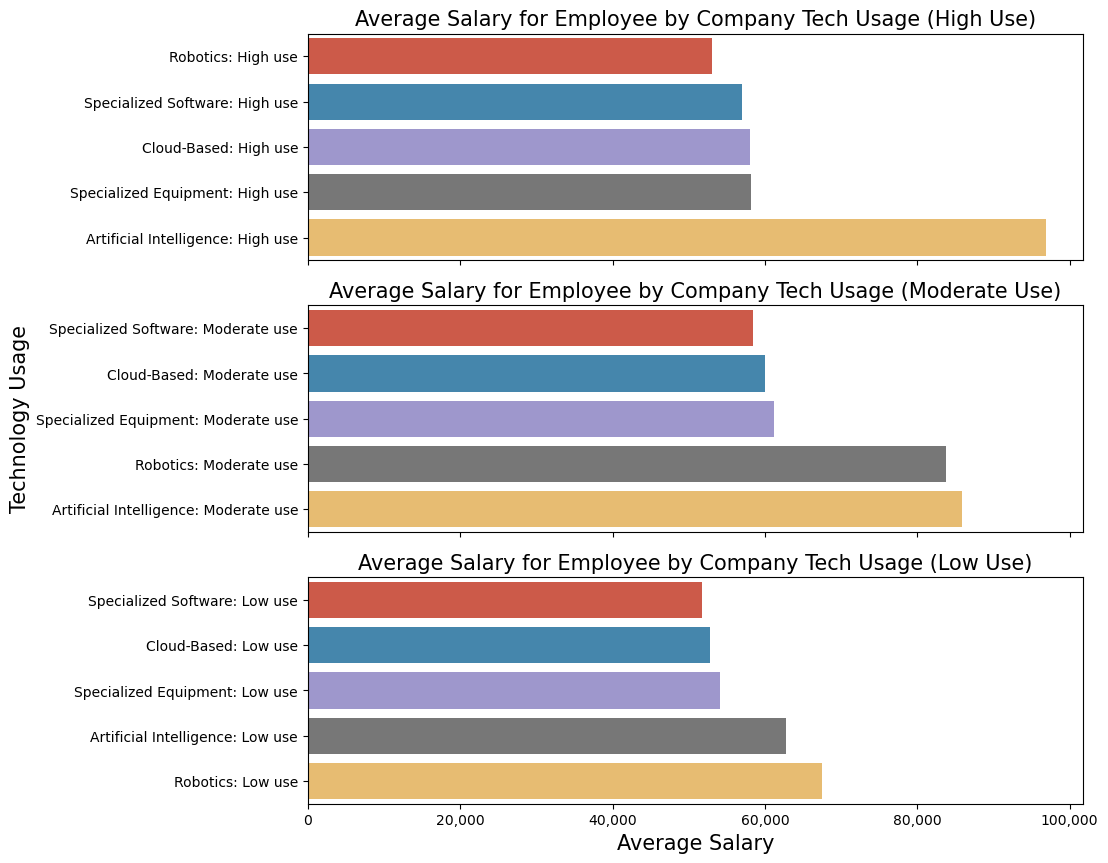

In [ ]:
# set up subplots and figure size
figure, axis = plt.subplots(3, sharex=True, figsize=(10, 10))
plt.style.use('ggplot')

# plot the high-use tech data on the first plot
sns.barplot(ax = axis[0], y = techvisual_1_df_High["tech_use"], x = techvisual_1_df_High["avg_salary"])
axis[0].set_title("Average Salary for Employee by Company Tech Usage (High Use)", fontsize = 15)
axis[0].set_xlabel("")
axis[0].set_ylabel("")

# plot the moderate-use tech data on the second plot
sns.barplot(ax = axis[1], y = techvisual_1_df_Mod["tech_use"], x = techvisual_1_df_Mod["avg_salary"])
axis[1].set_title("Average Salary for Employee by Company Tech Usage (Moderate Use)", fontsize = 15)
axis[1].set_xlabel("")
axis[1].set_ylabel("Technology Usage", fontsize = 15)

# plot the low-use tech data on the third plot
sns.barplot(ax = axis[2], y = techvisual_1_df_Low["tech_use"], x = techvisual_1_df_Low["avg_salary"])
axis[2].set_title("Average Salary for Employee by Company Tech Usage (Low Use)", fontsize = 15)
axis[2].set_xlabel("Average Salary", fontsize = 15)
axis[2].set_ylabel("")

# makes sure tick labels appear with commas
current_values = plt.gca().get_xticks();
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values]);

plt.show()

##### What does this visual show?


##### Tech Visual 2
Using the same datasets, we then sorted by the revenue column and graphed the same thing for revenues instead.

In [ ]:
# sort each dataframe (high, moderate, low) by revenues
techvisual_1_df_High.sort_values(by = "revenue", inplace= True)
techvisual_1_df_Mod.sort_values(by = "revenue", inplace= True)
techvisual_1_df_Low.sort_values(by = "revenue", inplace= True)

C:\Users\zach3\AppData\Local\Temp\ipykernel_11008\558653268.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values]);


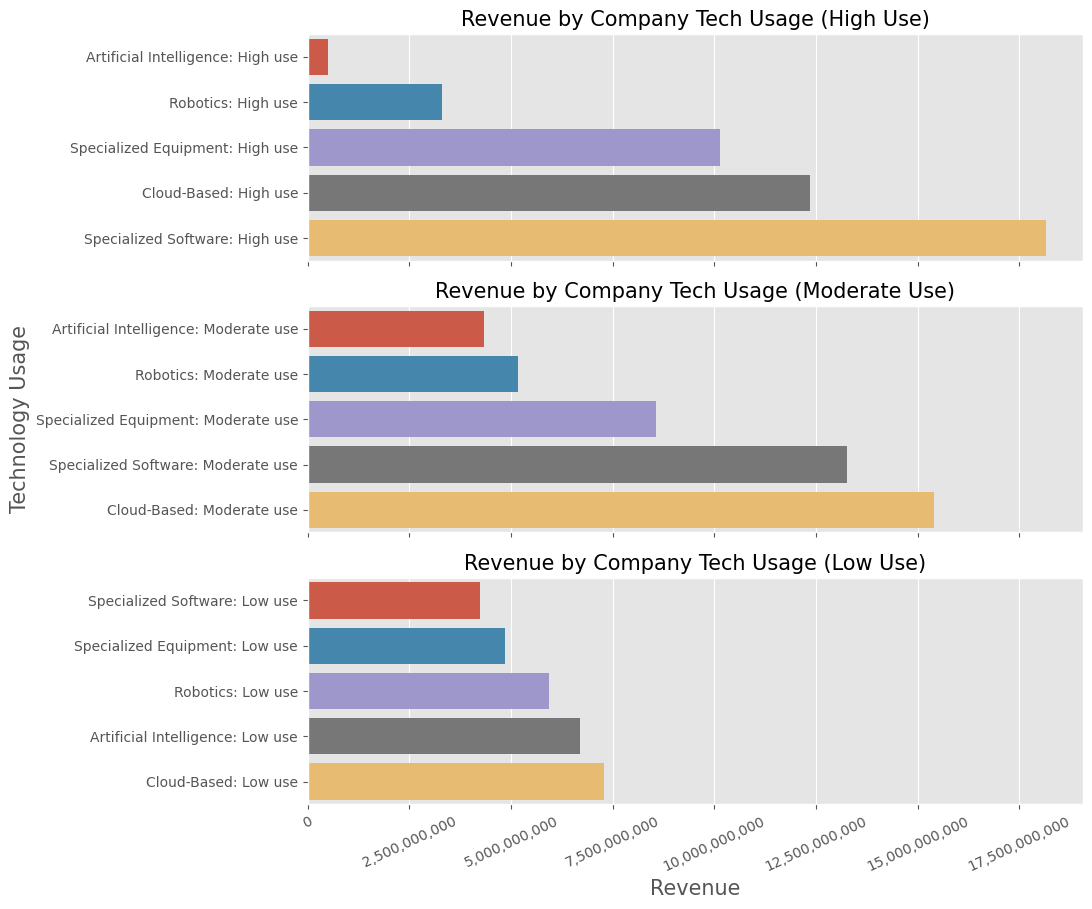

In [ ]:
# set up subplots and figure size
figure, axis = plt.subplots(3, sharex=True, figsize=(10, 10))
plt.style.use('ggplot')

# plot the high-use tech data on the first plot
sns.barplot(ax = axis[0], y = techvisual_1_df_High["tech_use"], x = techvisual_1_df_High["revenue"])
axis[0].set_title("Revenue by Company Tech Usage (High Use)", fontsize = 15);
axis[0].set_xlabel("")
axis[0].set_ylabel("");

# plot the moderate-use tech data on the second plot
sns.barplot(ax = axis[1], y = techvisual_1_df_Mod["tech_use"], x = techvisual_1_df_Mod["revenue"])
axis[1].set_title("Revenue by Company Tech Usage (Moderate Use)", fontsize = 15)
axis[1].set_xlabel("")
axis[1].set_ylabel("Technology Usage", fontsize = 15);

# plot the low-use tech data on the third plot
sns.barplot(ax = axis[2], y = techvisual_1_df_Low["tech_use"], x = techvisual_1_df_Low["revenue"])
axis[2].set_title("Revenue by Company Tech Usage (Low Use)", fontsize = 15)
axis[2].set_xlabel("Revenue", fontsize = 15);
axis[2].set_ylabel("");

# make sure tick labels are NOT in scientific notation and have commas
plt.ticklabel_format(style='plain', axis= 'x')
plt.xticks(rotation = 25)
current_values = plt.gca().get_xticks();
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values]);

plt.show();

##### What does this visual show?

##### Tech Visual 3

This visual looks at each type of technology which every single tech-use category compared to average salary. For this visual we created a dataframe for each type of technology (artificial intelligence, cloud-based, specialized software, specialized equipment, and Robotics). Additionally, we created the average salary column within these dataframes using the same method discussed previously.

In [ ]:
# get only data where tech_use is about Artificial Intelligence
techvisual_3_df_AI = techvisual_1_df[(techvisual_1_df['tech_use'].str.contains('Artificial Intelligence'))]

# group by tech_use and sum the other columns
techvisual_3_df_AI = techvisual_3_df_AI.groupby(by = "tech_use", as_index=False).sum().sort_values(by = "annual_payroll")

# create average salary column using the number of employes and annual payroll columns
techvisual_3_df_AI["avg_salary"] = (techvisual_3_df_AI["annual_payroll"]/techvisual_3_df_AI["number_of_employees"])*1000

# sort by average salary
techvisual_3_df_AI.sort_values(by = "avg_salary", inplace= True)

In [ ]:
# repeat steps for Robotics
techvisual_3_df_Rob = techvisual_1_df[(techvisual_1_df['tech_use'].str.contains('Robotics'))]
techvisual_3_df_Rob = techvisual_3_df_Rob.groupby(by = "tech_use", as_index=False).sum().sort_values(by = "annual_payroll")
techvisual_3_df_Rob["avg_salary"] = (techvisual_3_df_Rob["annual_payroll"]/techvisual_3_df_Rob["number_of_employees"])*1000
techvisual_3_df_Rob.sort_values(by = "avg_salary", inplace= True)

In [ ]:
# repeat steps for Specialized Equipment
techvisual_3_df_SE = techvisual_1_df[(techvisual_1_df['tech_use'].str.contains('Specialized Equipment'))]
techvisual_3_df_SE = techvisual_3_df_SE.groupby(by = "tech_use", as_index=False).sum().sort_values(by = "annual_payroll")
techvisual_3_df_SE["avg_salary"] = (techvisual_3_df_SE["annual_payroll"]/techvisual_3_df_SE["number_of_employees"])*1000
techvisual_3_df_SE.sort_values(by = "avg_salary", inplace= True)

In [ ]:
# repeat steps for Cloud-Based
techvisual_3_df_CB = techvisual_1_df[(techvisual_1_df['tech_use'].str.contains('Cloud-Based'))]
techvisual_3_df_CB = techvisual_3_df_CB.groupby(by = "tech_use", as_index=False).sum().sort_values(by = "annual_payroll")
techvisual_3_df_CB["avg_salary"] = (techvisual_3_df_CB["annual_payroll"]/techvisual_3_df_CB["number_of_employees"])*1000
techvisual_3_df_CB.sort_values(by = "avg_salary", inplace= True)

In [ ]:
# repeat steps for Specialized Software
techvisual_3_df_SS = techvisual_1_df[(techvisual_1_df['tech_use'].str.contains('Specialized Software'))]
techvisual_3_df_SS = techvisual_3_df_SS.groupby(by = "tech_use", as_index=False).sum().sort_values(by = "annual_payroll")
techvisual_3_df_SS["avg_salary"] = (techvisual_3_df_SS["annual_payroll"]/techvisual_3_df_SS["number_of_employees"])*1000
techvisual_3_df_SS.sort_values(by = "avg_salary", inplace= True)

C:\Users\zach3\AppData\Local\Temp\ipykernel_11008\4254745818.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values]);


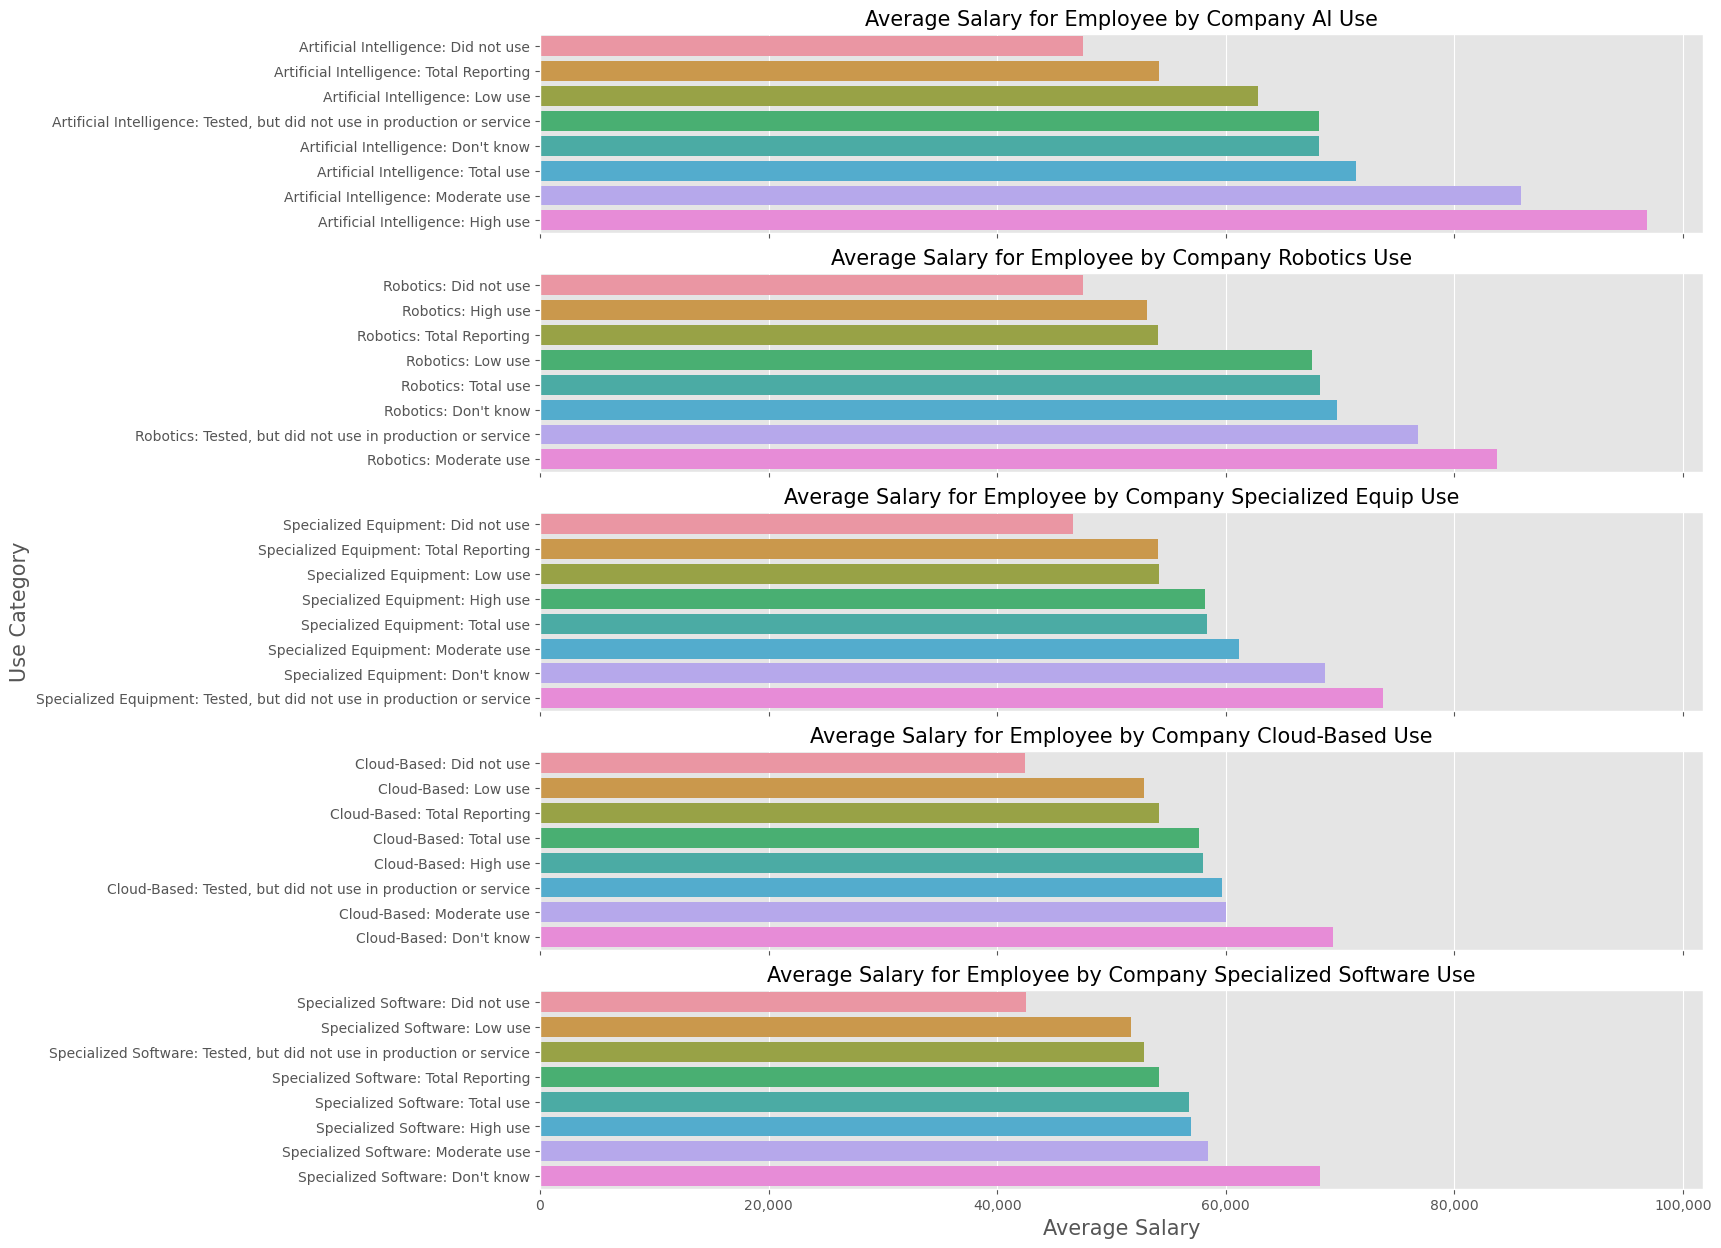

In [ ]:
# set up subplots, figure size, and style
figure, axis = plt.subplots(5, sharex=True, figsize=(15, 15))
plt.style.use('ggplot')

# plot the Artificial Intelligence data
sns.barplot(ax = axis[0], y = techvisual_3_df_AI["tech_use"], x = techvisual_3_df_AI["avg_salary"])
axis[0].set_title("Average Salary for Employee by Company AI Use", fontsize=15)
axis[0].set_xlabel("")
axis[0].set_ylabel("");

# plot the Robotics data
sns.barplot(ax = axis[1], y = techvisual_3_df_Rob["tech_use"], x = techvisual_3_df_Rob["avg_salary"])
axis[1].set_title("Average Salary for Employee by Company Robotics Use", fontsize=15)
axis[1].set_xlabel("")
axis[1].set_ylabel("");

# plot the Specialized Equipment data
sns.barplot(ax = axis[2], y = techvisual_3_df_SE["tech_use"], x = techvisual_3_df_SE["avg_salary"])
axis[2].set_title("Average Salary for Employee by Company Specialized Equip Use", fontsize=15)
axis[2].set_xlabel("")
axis[2].set_ylabel("Use Category", fontsize=15);

# plot the Cloud-Based data
sns.barplot(ax = axis[3], y = techvisual_3_df_CB["tech_use"], x = techvisual_3_df_CB["avg_salary"])
axis[3].set_title("Average Salary for Employee by Company Cloud-Based Use", fontsize=15)
axis[3].set_xlabel("")
axis[3].set_ylabel("");

# plot the Specialized Software data
sns.barplot(ax = axis[4], y = techvisual_3_df_SS["tech_use"], x = techvisual_3_df_SS["avg_salary"])
axis[4].set_title("Average Salary for Employee by Company Specialized Software Use", fontsize=15)
axis[4].set_xlabel("Average Salary", fontsize=15)
axis[4].set_ylabel("")

# makes sure tick labels appear with commas
current_values = plt.gca().get_xticks();
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values]);

plt.show();

##### What does this visual show?

### Individual State Dataset

##### Extracting the Data

Using the same method as above we created individual variables to hold each part of the api url. Then using an f-string we combine each part of this string into one final url. This url is then later used to retrieve the data we are trying to obtain.

In [ ]:
# each part of the api url gets its own variable
apikey = '&key=240ad37f761e431bc5288cca3370427cb54d59b3'
get = 'get=GEO_ID,NAME,EMP,EMP_F,ETH_GROUP_LABEL,FACTORS_P,FACTORS_P_LABEL,FACTORS_U,FACTORS_U_LABEL,FIRMPDEMP,FIRMPDEMP_F,IMPACTWF_P,IMPACTWF_P_LABEL,IMPACTWF_U,IMPACTWF_U_LABEL,IMPACTWK_P,IMPACTWK_P_LABEL,IMPACTWK_U,IMPACTWK_U_LABEL,MOTPRODTECH,MOTPRODTECH_LABEL,MOTUSETECH,MOTUSETECH_LABEL,NAICS2017_LABEL,NSFSZFI,NSFSZFI_LABEL,PAYANN,RACE_GROUP_LABEL,RCPPDEMP,RCPPDEMP_F,SEX_LABEL,TECHSELL,TECHSELL_LABEL,TECHUSE,TECHUSE_LABEL,VET_GROUP_LABEL'
for_filter = '&for=state:*'
base_url = 'https://api.census.gov/data/2018/abstcb?'

# use an f string to combine each part into the final api call
url = f"{base_url}{get}{for_filter}{apikey}"

We perform a get request using the requests library, then confirm that the get request worked as expected. If it worked as expected, Response 200 should be printed below this code cell.

In [ ]:
# perform get request and confirm it worked (looking for <Response [200]>)
r = requests.get(url=url)
print(r)

<Response [200]>


Then we load the data from the get request into a pandas dataframe. We do this by first, taking the get request and then putting it into json format. Since, json format can be read as a dictionary in python, we then use the pd.DataFrame.from_dict method on the json to put the data into a dataframe. Once the data is within the dataframe, the first row displays the column names. We fix this problem and set the columns equal to this first row and then remove the row from the data.

In [ ]:
# load get request into json format
r = json.loads(r.text)

# load json into pandas dataframe
data = pd.DataFrame.from_dict(r)

# fix column headers
columns = data.iloc[0]
new_data = data.values[1:]
tech_data_state = pd.DataFrame(new_data, columns=columns)

##### Transforming the Data

(Same steps as the US dataset)

In the next step, we performed our transformations on the data. To begin this section, we decided to keep only specified columns. We dropped the flag columns as they were almost entirely null and not very helpful. Additionally, we opted to keep the label columns instead of the numbered columns (i.e. we keep factors_p_label but not factors_p). We did this so that the labels make more sense to another human who would try look at our data or visuals.

In addition to removing the unnecessary columns, we also needed to change the data types of certain variables. When you read a csv into a dataFrame, the types of the columns tend to get changed into strings even if they should be ints or floats. So for columns like EMP, PAYANN, etc. we need to change their types to ints. This will allow us to perform mathematical operations on these columns and will give us numerical data to use with our visuals.

Then the final transformation on the dataset was to rename all of the column names. This is again specifically helpful to the audience of our data and graphics. This step ensures that the columns more understandable to the average human. Once this step was completed the data was cleaned and ready to be used for visuals.

In [ ]:
keep_columns = ['NAME', 'EMP','ETH_GROUP_LABEL', 'FACTORS_P_LABEL', 'FACTORS_U_LABEL', 'FIRMPDEMP', 'IMPACTWF_P_LABEL', 'IMPACTWF_U_LABEL', 'IMPACTWK_P_LABEL', 'IMPACTWK_U_LABEL', 'MOTPRODTECH_LABEL', 'MOTUSETECH_LABEL', 'NAICS2017_LABEL', 'NSFSZFI_LABEL', 'PAYANN', 'RACE_GROUP_LABEL', 'RCPPDEMP', 'SEX_LABEL', 'TECHSELL_LABEL', 'TECHUSE_LABEL', 'VET_GROUP_LABEL']
tech_data_state = tech_data_state[keep_columns]
int_columns = ['EMP', 'FIRMPDEMP', 'PAYANN', 'RCPPDEMP']
tech_data_state[int_columns] = tech_data_state[int_columns].astype('int64')
tech_data_state.rename(columns={
    'NAME'              :'state',
    'EMP'               :'number_of_employees',
    'ETH_GROUP_LABEL'   :'ethnicity_group',
    'FACTORS_P_LABEL'   :'tech_production_factors',
    'FACTORS_U_LABEL'   :'tech_use_factors',
    'FIRMPDEMP'         :'number_of_firms',
    'IMPACTWF_P_LABEL'  :'tech_production_impact_workforce',
    'IMPACTWF_U_LABEL'  :'tech_use_impact_workforce',
    'IMPACTWK_P_LABEL'  :'tech_production_impact_workers',
    'IMPACTWK_U_LABEL'  :'tech_use_impact_workers',
    'MOTPRODTECH_LABEL' :'tech_production_motivation',
    'MOTUSETECH_LABEL'  :'tech_use_motivation',
    'NAICS2017_LABEL'   :'industry',
    'NSFSZFI_LABEL'     :'firm_employment_size',
    'PAYANN'            :'annual_payroll',
    'RACE_GROUP_LABEL'  :'race_group',
    'RCPPDEMP'          :'revenue',
    'SEX_LABEL'         :'sex',
    'TECHSELL_LABEL'    :'tech_production',
    'TECHUSE_LABEL'     :'tech_use',
    'VET_GROUP_LABEL'   :'vetern_group'   
},
inplace=True);

##### Preparing the Data for Visualizations

Now that we were working with a dataset that had state data as well, that became the focus of this final visual. For this visual, we want to show how techuse is related to salary across differing states. In order to do this, we first made a dataframe that included only the neccesary columns. Additionally, we only included rows were tech_use did NOT equal All firms. These are aggregated total columns and are not needed for the visual we are attempting to build.

In [ ]:
# create dataframe with only neccesary columns
techvisual_4_df = tech_data_state[:][["state", "number_of_employees", "annual_payroll", "revenue", "tech_use"]]

# only keep rows that are NOT aggregated totals of tech_use
techvisual_4_df = techvisual_4_df[(techvisual_4_df["tech_use"] != "All firms")]


Next since there are already multiple factors at play, we decided to exclusively focus on high-use data only. This means that we will only analyze how salaries differ by state based on the high-use technology data. In the cell below, we begin by creating a dataframe of the high-use technology only. Then we split that data into 5 different dataframes based on which technology the data is based on.

In [ ]:
# create a dataframe that contains only high-use tech data
techvisual_4_df_High = techvisual_4_df[(techvisual_4_df['tech_use'].str.contains('High'))]

# group by tech_use and state while summing the other categories
techvisual_4_df_High = techvisual_4_df_High.groupby(by = ["tech_use", "state"], as_index=False)[["annual_payroll", "number_of_employees"]].sum()

# create average salary column, fill any na values with 0 (avoids errors later), and sort the values
techvisual_4_df_High["avg_salary"] = (techvisual_4_df_High["annual_payroll"]/techvisual_4_df_High["number_of_employees"])*1000
techvisual_4_df_High["avg_salary"].fillna(0, inplace=True)
techvisual_4_df_High.sort_values(by = "avg_salary", inplace= True)

# create specific dataframes for each type of technology
techvisual_4_df_High_Rob = techvisual_4_df_High[(techvisual_4_df_High['tech_use'].str.contains('Robotics'))]
techvisual_4_df_High_SE = techvisual_4_df_High[(techvisual_4_df_High['tech_use'].str.contains('Specialized Equipment'))]
techvisual_4_df_High_SS = techvisual_4_df_High[(techvisual_4_df_High['tech_use'].str.contains('Specialized Software'))]
techvisual_4_df_High_CB = techvisual_4_df_High[(techvisual_4_df_High['tech_use'].str.contains('Cloud-Based'))]
techvisual_4_df_High_AI = techvisual_4_df_High[(techvisual_4_df_High['tech_use'].str.contains('Artificial Intelligence'))]


In the next cell, we prepped the data to be merged back together. In this step, for each technology we grab only the columns related to state and average salary. Then, we renamed the average salary column so we can distinguish between them when we merge all the data together.

In [ ]:
# grab columns for Artificial Intelligence and rename salary column
techvisual_4_df_High_AI = techvisual_4_df_High_AI[["state", "avg_salary"]]
techvisual_4_df_High_AI.rename(columns = {"avg_salary" : "avg_salary_AI"}, inplace = True)

# grab columns for Robotics and rename salary column
techvisual_4_df_High_Rob = techvisual_4_df_High_Rob[["state", "avg_salary"]]
techvisual_4_df_High_Rob.rename(columns = {"avg_salary" : "avg_salary_Rob"}, inplace = True)

# grab columns for Specialized Software and rename salary column
techvisual_4_df_High_SS = techvisual_4_df_High_SS[["state", "avg_salary"]]
techvisual_4_df_High_SS.rename(columns = {"avg_salary" : "avg_salary_SS"}, inplace = True)

# grab columns for Specialized Equipment and rename salary column
techvisual_4_df_High_SE = techvisual_4_df_High_SE[["state", "avg_salary"]]
techvisual_4_df_High_SE.rename(columns = {"avg_salary" : "avg_salary_SE"}, inplace = True)

# grab columns for Cloud-Based and rename salary column
techvisual_4_df_High_CB = techvisual_4_df_High_CB[["state", "avg_salary"]]
techvisual_4_df_High_CB.rename(columns = {"avg_salary" : "avg_salary_CB"}, inplace = True)

Now we can merge the 5 differing dataframes based on their state columns. This will give us one final dataframe to use to build the visual. The data should have 51 rows (all states + DC) and contain five different salaries based on the differing technologies.

In [ ]:
# merge the data related to salaries on the state column of each dataset
techvisual4_df = pd.merge(pd.merge(pd.merge(pd.merge(techvisual_4_df_High_AI, techvisual_4_df_High_Rob, on = "state"), techvisual_4_df_High_SS, on = "state"), techvisual_4_df_High_SE, on = "state"), techvisual_4_df_High_CB, on = "state")

# create a total column by summing the salaries of each row
techvisual4_df["total"] = techvisual4_df["avg_salary_AI"] + techvisual4_df["avg_salary_Rob"] + techvisual4_df["avg_salary_SS"] + techvisual4_df["avg_salary_SE"] + techvisual4_df["avg_salary_CB"]

# sort by total (make the visual look nicer), then drop the column
techvisual4_df.sort_values(by = "total", inplace=True)
techvisual4_df.drop(columns="total", inplace = True)

C:\Users\zach3\AppData\Local\Temp\ipykernel_11008\738614149.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(y) for y in current_values]);


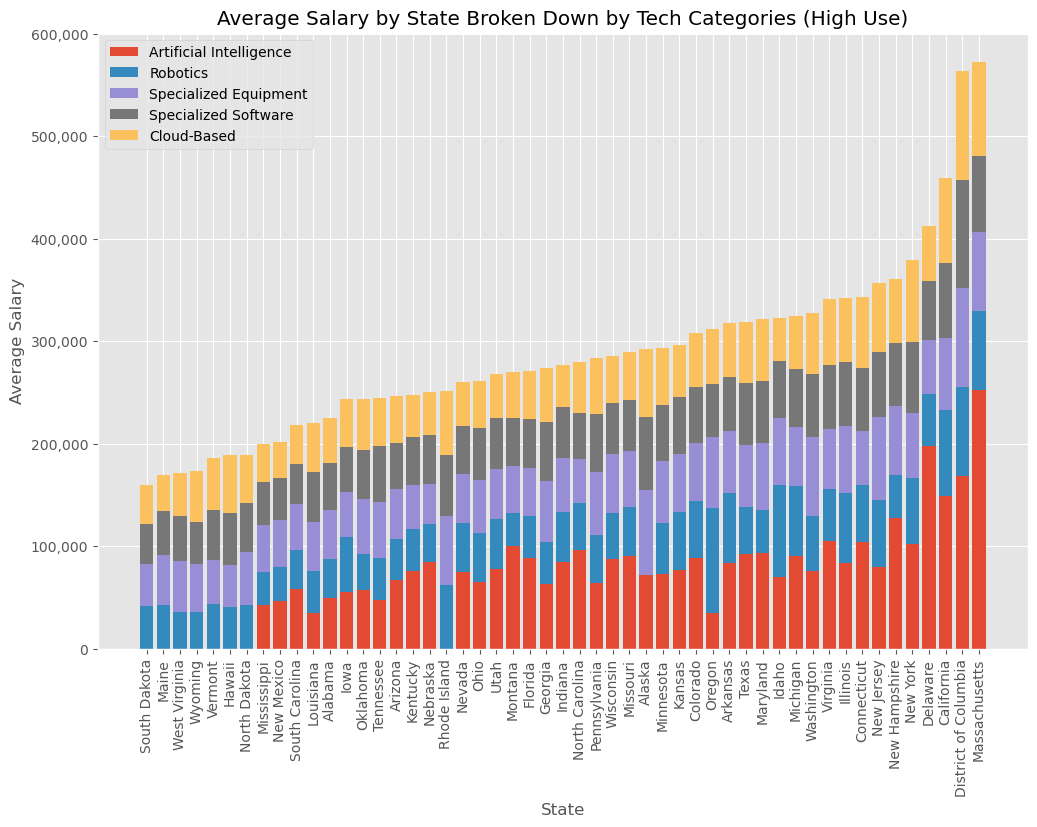

In [ ]:
# set figure size and style
plt.style.use('ggplot')
plt.figure(figsize= (12,8))

# plot Artificial Intelligence data
plt.bar(techvisual4_df["state"], techvisual4_df["avg_salary_AI"])

# plot Robotics data starting at end of AI
plt.bar(techvisual4_df["state"], techvisual4_df["avg_salary_Rob"], bottom=techvisual4_df["avg_salary_AI"].values)

# plot Specialized Equipment data starting at end of AI + Robotics
plt.bar(techvisual4_df["state"], techvisual4_df["avg_salary_SE"], bottom=techvisual4_df["avg_salary_AI"].values+techvisual4_df["avg_salary_Rob"].values)

# plot Specialized Software data starting at end of AI + Robotics + SE
plt.bar(techvisual4_df["state"], techvisual4_df["avg_salary_SS"], bottom=techvisual4_df["avg_salary_AI"].values+techvisual4_df["avg_salary_Rob"].values+techvisual4_df["avg_salary_SE"].values)

# plot Cloud Based data starting at end of AI + Robotics + SE + SS
plt.bar(techvisual4_df["state"], techvisual4_df["avg_salary_CB"], bottom=techvisual4_df["avg_salary_AI"].values+techvisual4_df["avg_salary_Rob"].values+techvisual4_df["avg_salary_SE"].values+techvisual4_df["avg_salary_SS"].values)

# label and format graph
plt.xlabel("State")
plt.ylabel("Average Salary")
plt.legend(["Artificial Intelligence", "Robotics", "Specialized Equipment", "Specialized Software", "Cloud-Based"])
plt.title("Average Salary by State Broken Down by Tech Categories (High Use)")

# fix the tick labels and formatting
plt.xticks(rotation = 90)
current_values = plt.gca().get_yticks();
plt.gca().set_yticklabels(['{:,.0f}'.format(y) for y in current_values]);

plt.show();

## Owner Characteristics

### Data Sources
This section uses the Data from the Owner Characteristics table from the 2019 Census Annual Business Survey. We specifically are looking at the Industry categories, Race, and Sex for the visualizations.

API key, urls, JSON

In [1]:
api_key = '746bed3342e20518ff645c2e6b0e3bec34de94a1'
get = 'GEO_ID,GEO_ID_F,NAME,GEOCOMP,NAICS2017,NAICS2017_F,NAICS2017_LABEL,INDGROUP,INDLEVEL,SECTOR,SUBSECTOR,OWNCHAR,OWNCHAR_LABEL,OWNER_ETH,OWNER_ETH_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_SEX,OWNER_SEX_LABEL,OWNER_VET,OWNER_VET_LABEL,OWNPDEMP,OWNPDEMP_F,QDESC,QDESC_LABEL,STATE'
url = f'https://api.census.gov/data/2018/abscbo?get={get}&for=us:*&key={api_key}'
url_state = f'https://api.census.gov/data/2018/abscbo?get={get}&for=state:*&key={api_key}'

In [4]:
r = requests.get(url)
r_state = requests.get(url_state)

In [5]:
r = r.json()
r = json.dumps(r)

r_state = r_state.json()
r_state = json.dumps(r_state)

## Step 2: Transformation

Examine table (country data)

In [ ]:
p = pd.read_json(r)
p.info()
p.head(10)

Promote First Row as Column Headers, Remove Unnecessary Columns (country data)

In [7]:
# country data edit columns

headers = p.iloc[0]

#promote first row as column headers
new_p = pd.DataFrame(p.values[1:], columns=headers)

#remove unnecessary columns
new_p = new_p.drop(columns = ['GEO_ID','GEO_ID_F','NAME','GEOCOMP','NAICS2017','NAICS2017_F','INDGROUP','INDLEVEL','SECTOR', 'SUBSECTOR','OWNCHAR','OWNER_ETH','OWNER_RACE', 'OWNPDEMP', 'OWNER_SEX','OWNER_VET','OWNPDEMP_F','QDESC','us'])

Verify Changes

In [8]:
# check
new_p.head()

,NAICS2017_LABEL,OWNCHAR_LABEL,OWNER_ETH_LABEL,OWNER_RACE_LABEL,OWNER_SEX_LABEL,OWNER_VET_LABEL,QDESC_LABEL,STATE
0,Total for all sectors,2013 to 2017,All owners of respondent firms,Black or African American,All owners of respondent firms,All owners of respondent firms,YRACQBUS,None
1,Total for all sectors,2018,All owners of respondent firms,Black or African American,All owners of respondent firms,All owners of respondent firms,YRACQBUS,None
2,Total for all sectors,Don't know,All owners of respondent firms,Black or African American,All owners of respondent firms,All owners of respondent firms,YRACQBUS,None
3,Total for all sectors,Total reporting,All owners of respondent firms,Black or African American,All owners of respondent firms,All owners of respondent firms,YRACQBUS,None
4,Total for all sectors,Item not reported,All owners of respondent firms,Black or African American,All owners of respondent firms,All owners of respondent firms,YRACQBUS,None


Examine Table (state data)

In [ ]:
p_state = pd.read_json(r_state)
p_state.info()
p_state.head(10)

Promote Column Headers, Remove Unnecessary Columns, Verify Changes

In [11]:
# state data edit columns

headers = p_state.iloc[0]

#promote first row as column headers
state_data = pd.DataFrame(p_state.values[1:], columns=headers)

#remove unnecessary columns
state_data = state_data.drop(columns = ['GEO_ID','GEO_ID_F','GEOCOMP','NAICS2017','NAICS2017_F', 'NAICS2017_LABEL','INDGROUP','INDLEVEL','SECTOR', 'SUBSECTOR','OWNCHAR','OWNER_ETH','OWNER_RACE','OWNER_SEX', 'OWNER_VET','OWNPDEMP', 'OWNPDEMP_F','QDESC','STATE', 'state'])

state_data.tail()

,NAME,OWNCHAR_LABEL,OWNER_ETH_LABEL,OWNER_RACE_LABEL,OWNER_SEX_LABEL,OWNER_VET_LABEL,QDESC_LABEL
5924,Minnesota,Item not reported,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,USCITIZEN
5925,Minnesota,Item not reported,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,Veteran,DISVETRN
5926,Minnesota,Service-disabled veteran,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,Veteran,DISVETRN
5927,Minnesota,Not a service-disabled veteran,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,Veteran,DISVETRN
5928,Minnesota,Total reporting,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,Veteran,DISVETRN


Rename Columns (country)

In [12]:
country_data = new_p.rename({"NAICS2017_LABEL": "Industry",
                             "OWNCHAR_LABEL": "Responses",
                             "OWNER_ETH_LABEL": "Ethnicity",
                             "OWNER_RACE_LABEL": "Race",
                             "OWNER_SEX_LABEL": "Sex",
                             "OWNER_VET_LABEL": "Veteran Status",
                             "QDESC_LABEL": "Question Description",
                             "STATE": "State"},
                           axis = 'columns')
country_data.head()

,Industry,Responses,Ethnicity,Race,Sex,Veteran Status,Question Description,State
0,Total for all sectors,2013 to 2017,All owners of respondent firms,Black or African American,All owners of respondent firms,All owners of respondent firms,YRACQBUS,None
1,Total for all sectors,2018,All owners of respondent firms,Black or African American,All owners of respondent firms,All owners of respondent firms,YRACQBUS,None
2,Total for all sectors,Don't know,All owners of respondent firms,Black or African American,All owners of respondent firms,All owners of respondent firms,YRACQBUS,None
3,Total for all sectors,Total reporting,All owners of respondent firms,Black or African American,All owners of respondent firms,All owners of respondent firms,YRACQBUS,None
4,Total for all sectors,Item not reported,All owners of respondent firms,Black or African American,All owners of respondent firms,All owners of respondent firms,YRACQBUS,None


Rename Columns (state)

In [13]:
states_data = state_data.rename({"NAME": "State",
                                "OWNCHAR_LABEL": "Responses",
                                "OWNPDEMP": "Department",
                                "OWNER_ETH_LABEL": "Ethnicity",
                                "OWNER_RACE_LABEL": "Race",
                                "OWNER_SEX_LABEL": "Sex",
                                "OWNER_VET_LABEL": "Veteran Status",
                                "QDESC_LABEL": "Question Description"},
                               axis = 'columns')
states_data.tail()

,State,Responses,Ethnicity,Race,Sex,Veteran Status,Question Description
5924,Minnesota,Item not reported,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,USCITIZEN
5925,Minnesota,Item not reported,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,Veteran,DISVETRN
5926,Minnesota,Service-disabled veteran,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,Veteran,DISVETRN
5927,Minnesota,Not a service-disabled veteran,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,Veteran,DISVETRN
5928,Minnesota,Total reporting,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,Veteran,DISVETRN


Look at table characteristics - both state and country

In [14]:
states_data.describe()

,State,Responses,Ethnicity,Race,Sex,Veteran Status,Question Description
count,5929,5929,5929,5929,5929,5929,5929
unique,51,98,1,1,1,2,11
top,Minnesota,Total reporting,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,REASONOWN
freq,117,561,5929,5929,5929,5389,1938


In [15]:
country_data.describe()

,Industry,Responses,Ethnicity,Race,Sex,Veteran Status,Question Description,State
count,104622,104622,104622,104622,104622,104622,104622,0
unique,21,98,3,8,3,3,11,0
top,Total for all sectors,Total reporting,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,REASONOWN,NaN
freq,5808,10261,83670,40409,57585,58800,39523,NaN


Replace values in question description column for readability

In [16]:
country_data["Question Description"] = country_data["Question Description"].replace(["YRACQBUS"],[ "Year Ownership Acquired"])
country_data["Question Description"] = country_data["Question Description"].replace(["PRIMINC"], ["Primary Income y/n"])
country_data["Question Description"] = country_data["Question Description"].replace(["EDUC"], ["Highest Educ. Level"])
country_data["Question Description"] = country_data["Question Description"].replace(["FLDEDUC"], ["Educ. Field"])
country_data["Question Description"] = country_data["Question Description"].replace(["OWNRAGE"], ["Age"])
country_data["Question Description"] = country_data["Question Description"].replace(["REASONOWN"], ["Reason for Owning"])
country_data["Question Description"] = country_data["Question Description"].replace(["PRIORBUSTAT"], ["Recent/Prior Owned Business Status"])
country_data["Question Description"] = country_data["Question Description"].replace(["DISVETRN"], ["Disabled Vet y/n"])
country_data["Question Description"] = country_data["Question Description"].replace(["VETSPECIFIC"], ["Specific Vet Chars."])
country_data["Question Description"] = country_data["Question Description"].replace(["USCITIZEN"], ["US Citizen y/n"])
country_data["Question Description"] = country_data["Question Description"].replace(["USBORN"], ["US Born y/n"])

states_data["Question Description"] = states_data["Question Description"].replace(["YRACQBUS"],[ "Year Ownership Acquired"])
states_data["Question Description"] = states_data["Question Description"].replace(["PRIMINC"], ["Primary Income y/n"])
states_data["Question Description"] = states_data["Question Description"].replace(["EDUC"], ["Highest Educ. Level"])
states_data["Question Description"] = states_data["Question Description"].replace(["FLDEDUC"], ["Educ. Field"])
states_data["Question Description"] = states_data["Question Description"].replace(["OWNRAGE"], ["Age"])
states_data["Question Description"] = states_data["Question Description"].replace(["REASONOWN"], ["Reason for Owning"])
states_data["Question Description"] = states_data["Question Description"].replace(["PRIORBUSTAT"], ["Recent/Prior Owned Business Status"])
states_data["Question Description"] = states_data["Question Description"].replace(["DISVETRN"], ["Disabled Vet y/n"])
states_data["Question Description"] = states_data["Question Description"].replace(["VETSPECIFIC"], ["Specific Vet Chars."])
states_data["Question Description"] = states_data["Question Description"].replace(["USCITIZEN"], ["US Citizen y/n"])
states_data["Question Description"] = states_data["Question Description"].replace(["USBORN"], ["US Born y/n"])



distinct_qs = country_data.drop_duplicates(subset=['Question Description'])
distinct_qs

,Industry,Responses,Ethnicity,Race,Sex,Veteran Status,Question Description,State
0,Total for all sectors,2013 to 2017,All owners of respondent firms,Black or African American,All owners of respondent firms,All owners of respondent firms,Year Ownership Acquired,None
410,Total for all sectors,Business was the owner's primary source of per...,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,Primary Income y/n,None
638,Total for all sectors,Less than high school graduate,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,Highest Educ. Level,None
1300,Total for all sectors,Art and humanities fields,Hispanic,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,Educ. Field,None
2333,Total for all sectors,35 to 44,All owners of respondent firms,Black or African American,Male,All owners of respondent firms,Age,None
2638,Total for all sectors,Wanted to be my own boss: Not important,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,Reason for Owning,None
3461,Total for all sectors,Other,All owners of respondent firms,Asian,All owners of respondent firms,All owners of respondent firms,Recent/Prior Owned Business Status,None
4215,Total for all sectors,Not a service-disabled veteran,All owners of respondent firms,Black or African American,All owners of respondent firms,Veteran,Disabled Vet y/n,None
4238,Total for all sectors,Served on active duty military service,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,Veteran,Specific Vet Chars.,None
5144,Total for all sectors,Item not reported,All owners of respondent firms,Native Hawaiian and Other Pacific Islander,All owners of respondent firms,All owners of respondent firms,US Citizen y/n,None


Replace values in Responses column for readability - Both state & country

In [17]:
country_data["Responses"] = country_data["Responses"].replace(["Not a service-disabled veteran"], ["No"])
country_data["Responses"] = country_data["Responses"].replace(["Service-disabled veteran"], ["Yes"])
country_data["Responses"] = country_data["Responses"].replace(["Owner was born in the U.S."], ["Yes"])
country_data["Responses"] = country_data["Responses"].replace(["Owner was not born in the U.S."], ["No"])
country_data["Responses"] = country_data["Responses"].replace(["Owner is a citizen of the U.S."], ["Yes"])
country_data["Responses"] = country_data["Responses"].replace(["Owner is not a citizen of the U.S."], ["No"])
country_data["Responses"] = country_data["Responses"].replace(["Business was the owner's primary source of personal income"], [1])
country_data["Responses"] = country_data["Responses"].replace(["Business was not the owner's primary source of personal income"], [0])

states_data["Responses"] = states_data["Responses"].replace(["Not a service-disabled veteran"], ["No"])
states_data["Responses"] = states_data["Responses"].replace(["Service-disabled veteran"], ["Yes"])
states_data["Responses"] = states_data["Responses"].replace(["Owner was born in the U.S."], ["Yes"])
states_data["Responses"] = states_data["Responses"].replace(["Owner was not born in the U.S."], ["No"])
states_data["Responses"] = states_data["Responses"].replace(["Owner is a citizen of the U.S."], ["Yes"])
states_data["Responses"] = states_data["Responses"].replace(["Owner is not a citizen of the U.S."], ["No"])              

Verify Changes (Swap commented out lines to check both)

In [18]:
# distinct_ans_c = country_data.drop_duplicates(subset=["Responses"])
# distinct_ans_c
distinct_ans_s = states_data.drop_duplicates(subset=['Responses'])
distinct_ans_s

,State,Responses,Ethnicity,Race,Sex,Veteran Status,Question Description
0,Mississippi,Item not reported,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,Recent/Prior Owned Business Status
1,Mississippi,Before 1980,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,Year Ownership Acquired
2,Mississippi,1980 to 1989,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,Year Ownership Acquired
3,Mississippi,1990 to 1999,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,Year Ownership Acquired
4,Mississippi,2000 to 2007,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,Year Ownership Acquired
...,...,...,...,...,...,...,...
111,Mississippi,Business is still operating and the owner stil...,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,Recent/Prior Owned Business Status
112,Mississippi,Business is no longer in operation,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,Recent/Prior Owned Business Status
113,Mississippi,Business was purchased by another individual,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,Recent/Prior Owned Business Status
114,Mississippi,Other,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,Recent/Prior Owned Business Status


## Step 3: Visualizations
==========================

Imports for Visuals

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

#### Visualization 1: Matplotlib Horizontal Bar
Used matplotlib to create horizontal bar chart showing number of owners by gender in each industry.

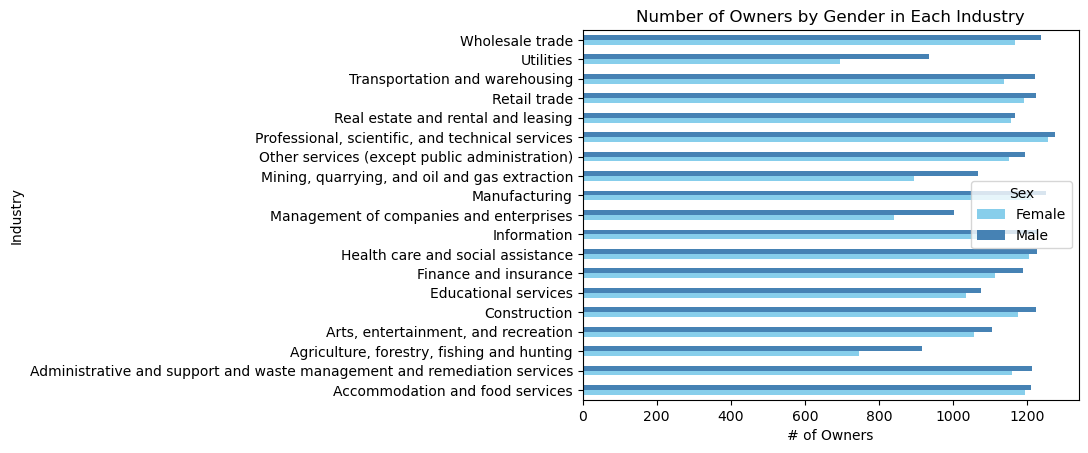

In [20]:
# Ensure total count for gender is not included
country_viz1 = country_data[country_data['Sex'].isin(['Female', 'Male'])]
# Ensure total count and unclassified for industry is not included
ind_viz1 = ['Wholesale trade', 'Utilities', 'Transportation and warehousing', 'Retail trade', 'Real estate and rental and leasing', 'Professional, scientific, and technical services', 'Other services (except public administration)', 'Mining, quarrying, and oil and gas extraction', 'Manufacturing', 'Management of companies and enterprises', 'Information', 'Health care and social assistance', 'Finance and insurance', 'Educational services', 'Construction', 'Arts, entertainment, and recreation', 'Agriculture, forestry, fishing and hunting', 'Administrative and support and waste management and remediation services', 'Accommodation and food services']
# new df variable for visualization 1
country_viz1 = country_viz1[country_viz1['Industry'].isin(ind_viz1)]
count_gen = country_viz1.groupby(['Industry', 'Sex'])['Sex'].size()
count_gen = count_gen.unstack(level=1)
# change colors, add axis labels
count_gen.plot.barh(color=['skyblue', 'steelblue'])
plt.xlabel('# of Owners')
plt.ylabel('Industry')
plt.title('Number of Owners by Gender in Each Industry')
plt.show()


#### Visualization 2: Matplotlib Stacked Bar
Create stacked bar chart to show race distribution among owners in each industry. 

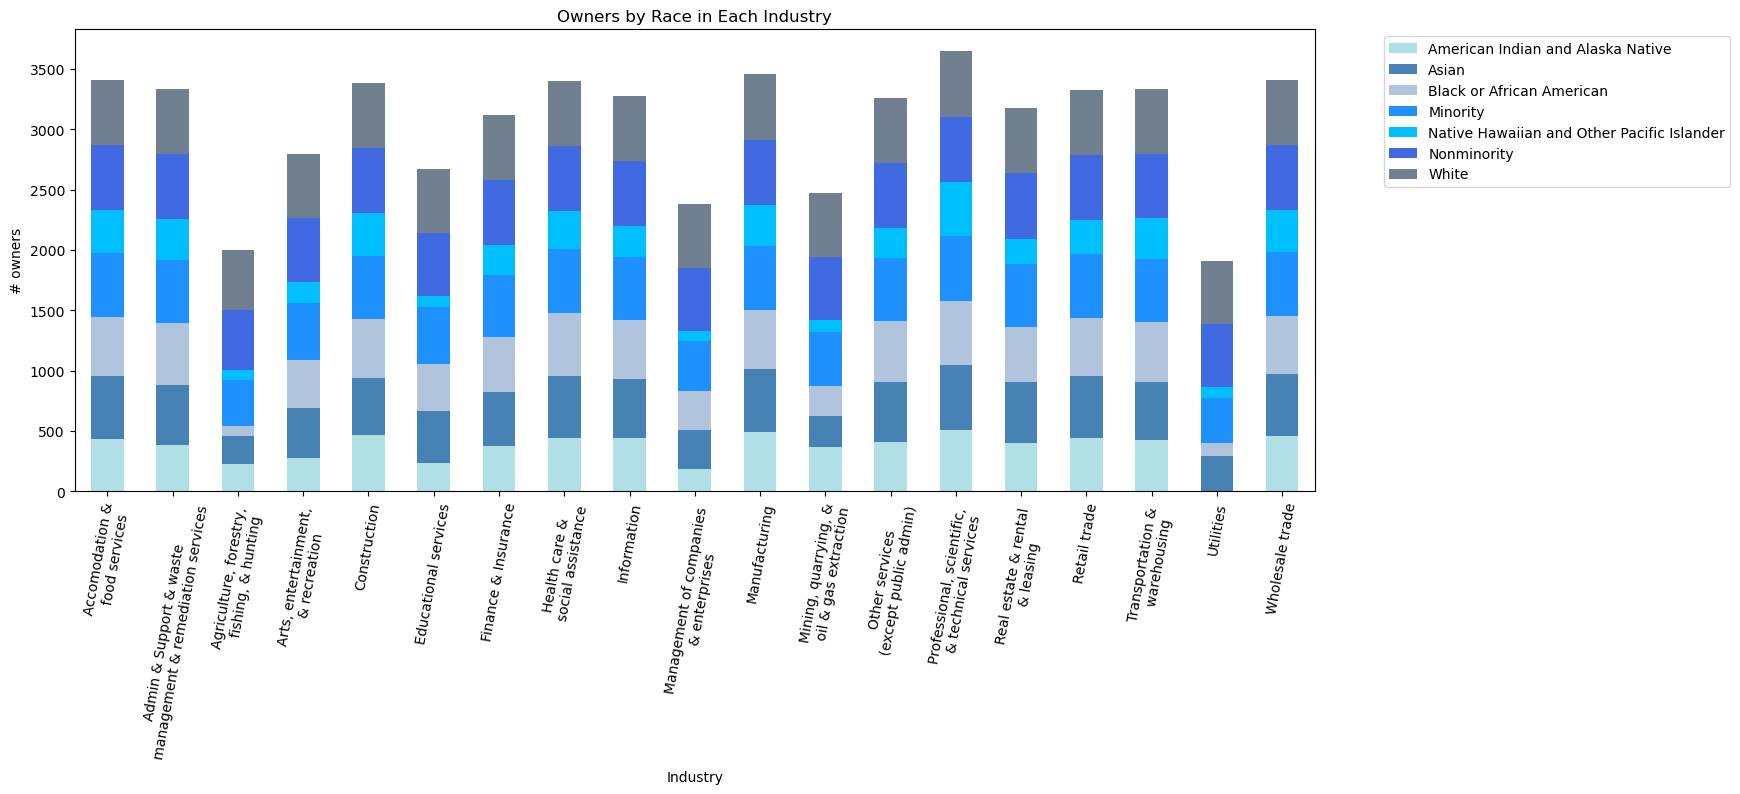

In [21]:
# Ensure total count for race is not included
country_viz2 = country_data[country_data['Race'].isin(['Black or African American', 'American Indian and Alaska Native', 'White', 'Nonminority', 'Asian', 'Native Hawaiian and Other Pacific Islander', 'Minority'])]

# Use ind_viz1 from 1st visual to ensure total count and unclassified for industry is not included
ind_viz2 = ind_viz1

# new df variable for visualization 1
country_viz2 = country_viz2[country_viz2['Industry'].isin(ind_viz2)]
count_race = country_viz2.groupby(['Industry', 'Race'])['Race'].size()
count_race = count_race.unstack(level=1)

# Change colors, add axis labels, title
ind_race = count_race.plot.bar(color=['powderblue', 'steelblue', 'lightsteelblue', 'dodgerblue', 'deepskyblue', 'royalblue', 'slategray'], stacked = True, width = 0.5, align = 'center', figsize = (16, 6))
plt.xlabel('Industry')
plt.ylabel('# owners')
plt.title('Owners by Race in Each Industry')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc = 'upper left')
ind_race.set_xticklabels(["Accomodation &\n food services", "Admin & Support & waste\n management & remediation services", "Agriculture, forestry, \n fishing, & hunting", "Arts, entertainment, \n & recreation", "Construction", "Educational services", "Finance & Insurance", "Health care & \n social assistance", "Information", "Management of companies \n & enterprises", "Manufacturing", "Mining, quarrying, &\n oil & gas extraction", "Other services\n (except public admin)", "Professional, scientific, \n & technical services", "Real estate & rental \n & leasing", "Retail trade", "Transportation & \n warehousing", "Utilities", "Wholesale trade"])
plt.xticks(rotation=80)
plt.show()

#### Visualization 2.1: Matplotlib Pie Chart
Created pie chart to show the overall distribution of owners by race across all industries. Intended to supplement Visualization 2. Combined White & Nonminority group into one because they are the 2 largest.

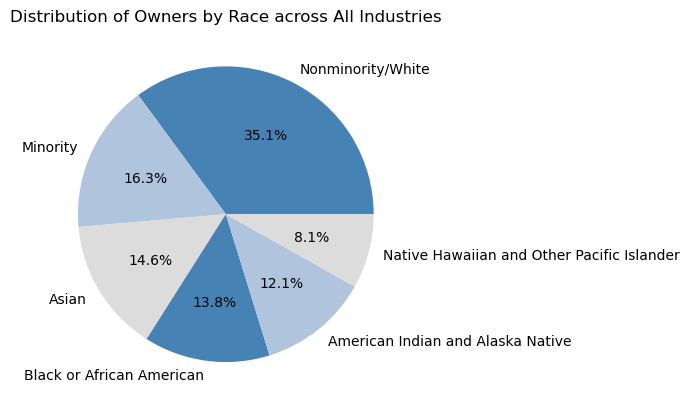

In [22]:
#create new variable
country_viz5 = country_viz2

# combine 2 largest groups: white and nonminority
country_viz5['Race'] = country_viz5['Race'].replace({
    'Nonminority': 'Nonminority/White',
    'White': 'Nonminority/White'
})
counts = country_viz5['Race'].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['steelblue','lightsteelblue','gainsboro','steelblue','lightsteelblue','gainsboro'])
plt.title('Distribution of Owners by Race across All Industries')
plt.show()

#### Visualization 3: Seaborn CountPlot
In this visualization we looked at the response to the question of whether the owned business was the owner's primary source of income. The yes/no answers were been converted to binary values (0, 1) for the visualization. We also used "Sex" as a variable in the plot to compare male to female. 

Text(0.5, 1.0, 'Male vs. Female Owners on Primary Source of Income')

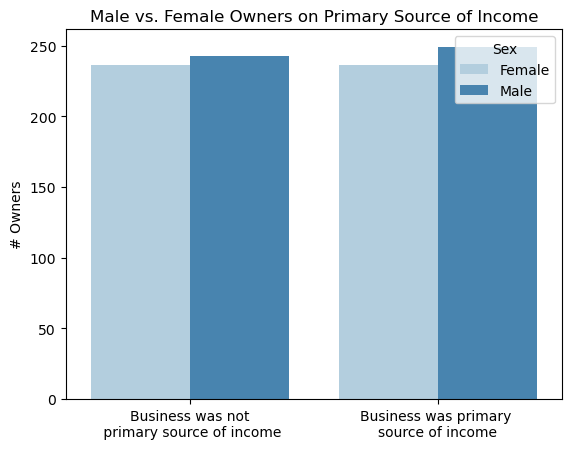

In [23]:
viz3 = country_data[(country_data["Responses"].isin([0, 1])) &
                     (country_data["Sex"].isin(["Male", "Female"]))]
prim_inc = sns.countplot(data=viz3, x = "Responses", hue = "Sex", palette = "Blues")
prim_inc.set_xticklabels(["Business was not\n primary source of income", "Business was primary \nsource of income"])
plt.xlabel("")
plt.ylabel("# Owners")
plt.title("Male vs. Female Owners on Primary Source of Income")